<a href="https://colab.research.google.com/github/May-Xiaoting-Zhou/MX-Project/blob/main/code/MX_2_spectrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Load the data
file_path = '/content/drive/MyDrive/MX_2/EEG/1. Filtered/Baseline/Subject_10_EEG_Baseline_OpenBCI-Trimmed.csv'  # Replace with the correct file path
df = pd.read_csv(file_path)

# Extract the time column and EEG signals
time = df['Sample Index']
eeg_signals = df.drop(columns=['Sample Index'])

# Function to generate and plot spectrogram
def plot_spectrogram(signal, fs, title):
    f, t, Sxx = spectrogram(signal, fs)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title(title)
    plt.colorbar(label='Intensity [dB]')
    plt.show()

# Sampling frequency (you may need to adjust this based on your data)
fs = 125  # Example value

# Generate and plot spectrogram for each EEG channel
for column in eeg_signals.columns:
    plot_spectrogram(eeg_signals[column], fs, f'Spectrogram of {column}')


API_KEY = '37cf2563e369844f2bf2c1cb2b0bedfd8f232d5d'

In [ ]:
import requests
import pandas as pd

# Your API Key
API_KEY = '37cf2563e369844f2bf2c1cb2b0bedfd8f232d5d'

# Base URL for ACS 2020 5-Year data
BASE_URL = "https://api.census.gov/data/2020/acs/acs5"

# Define the variables you want to retrieve
# Example: 'B01003_001E' is the variable for total population
params = {
    'get': 'NAME,B01003_001E',  # Add other variables as needed
    'for': 'congressional district:39',
    'in': 'state:06',  # California's FIPS code is 06
    'key': API_KEY
}

# Send the GET request to the Census API
response = requests.get(BASE_URL, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Convert the data into a pandas DataFrame
    columns = data[0]  # First row contains the column headers
    rows = data[1:]    # Remaining rows contain the actual data
    df = pd.DataFrame(rows, columns=columns)

    # Print or save the data
    print(df)
    # Save the data to a CSV file
    df.to_csv('california_39th_congressional_district.csv', index=False)
else:
    print(f"Error: {response.status_code}")

                                                NAME B01003_001E state  \
0  Congressional District 39 (116th Congress), Ca...      732667    06   

  congressional district  
0                     39  
                                                NAME B01003_001E state  \
0  Congressional District 39 (116th Congress), Ca...      732667    06   

  congressional district  
0                     39  


In [ ]:
df

,NAME,B01003_001E,state,congressional district
0,"Congressional District 39 (116th Congress), Ca...",732667,06,39


In [ ]:
import requests

# Replace 'your_api_key_here' with your actual Census Bureau API key
API_KEY = '37cf2563e369844f2bf2c1cb2b0bedfd8f232d5d'

# Base URL for ACS 5-year data (2019 is the latest available as of now)
BASE_URL = "https://api.census.gov/data/2019/acs/acs5"

# Define parameters for the API request
params = {
    'get': 'NAME,B01003_001E',  # B01003_001E is the total population field
    'for': 'congressional district:23',  # Texas's 23rd Congressional District
    'in': 'state:48',  # Texas state code
    'key': API_KEY
}

# Send the GET request to the Census Bureau API
response = requests.get(BASE_URL, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    for row in data:
        print(row)
else:
    print(f"Error: {response.status_code}")

['NAME', 'B01003_001E', 'state', 'congressional district']
['Congressional District 23 (116th Congress), Texas', '769173', '48', '23']


In [ ]:
import requests

# Replace 'your_api_key_here' with your actual Census Bureau API key
API_KEY = '37cf2563e369844f2bf2c1cb2b0bedfd8f232d5d' # Replace with your actual API key

# Base URL for ACS 5-year data (2019 ACS, for detailed data)
BASE_URL = "https://api.census.gov/data/2019/acs/acs5"

# Define parameters for population and key demographic variables
params = {
    'get': 'NAME,B01003_001E,B02001_002E,B02001_003E,B19013_001E,B15003_001E',  # Population, Race, Income, Education
    'for': 'congressional district:26',
    'in': 'state:12',  # Florida state code is 12
    'key': API_KEY
}

# Send the GET request to the Census Bureau API
response = requests.get(BASE_URL, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    for row in data:
        print(row)
else:
    print(f"Error: {response.status_code}")

['NAME', 'B01003_001E', 'B02001_002E', 'B02001_003E', 'B19013_001E', 'B15003_001E', 'state', 'congressional district']
['Congressional District 26 (116th Congress), Florida', '768910', '622570', '87896', '60405', '526773', '12', '26']


#  **populations and people**

	•	B01003_001E: Total population
	•	B02001_002E: White alone population
	•	B02001_003E: Black or African American population
	•	B19013_001E: Median household income
	•	B15003_001E: Educational attainment (high school or higher)

## Florida's 26th Congressional District

In [ ]:
import requests

# Replace 'your_api_key_here' with your actual Census Bureau API key
API_KEY = '37cf2563e369844f2bf2c1cb2b0bedfd8f232d5d' # Replace with your actual API key

# Base URL for ACS 5-year data (2019 ACS, for detailed data)
BASE_URL = "https://api.census.gov/data/2019/acs/acs5"

# Define parameters for population and key demographic variables
params = {
    'get': 'NAME,B01003_001E,B02001_002E,B02001_003E,B19013_001E,B15003_001E',  # Population, Race, Income, Education
    'for': 'congressional district:26',
    'in': 'state:12',  # Florida state code is 12
    'key': API_KEY
}

# Send the GET request to the Census Bureau API
response = requests.get(BASE_URL, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    for row in data:
        print(row)
else:
    print(f"Error: {response.status_code}")

['NAME', 'B01003_001E', 'B02001_002E', 'B02001_003E', 'B19013_001E', 'B15003_001E', 'state', 'congressional district']
['Congressional District 26 (116th Congress), Florida', '768910', '622570', '87896', '60405', '526773', '12', '26']


	•	B23025_005E: Unemployed individuals.
	•	B19013_001E: Median household income.
	•	B17001_002E: Population below the poverty level.
	•	B25077_001E: Median value of owner-occupied housing units.
	•	B11001_001E: Number of households.
	•	B01002_001E: Median age.
	•	B03002_003E: Population that is White alone.
	•	B03002_004E: Population that is Black or African American alone.
	•	B03002_012E: Population that is Hispanic or Latino.

In [ ]:
import requests

# Replace 'your_api_key_here' with your actual Census Bureau API key
API_KEY = '37cf2563e369844f2bf2c1cb2b0bedfd8f232d5d'

# Base URL for ACS 5-year data (use the most recent year available)
BASE_URL = "https://api.census.gov/data/2021/acs/acs5"

# Define parameters for the API request
params = {
    'get': ','.join([
        'NAME',                   # Name of the district
        'B23025_005E',             # Unemployment
        'B19013_001E',             # Median household income
        'B17001_002E',             # Poverty status
        'B25077_001E',             # Median value of owner-occupied housing units
        'B11001_001E',             # Total number of households
        'B01002_001E',             # Median age
        'B03002_003E',             # White alone (race)
        'B03002_004E',             # Black or African American alone (race)
        'B03002_012E',             # Hispanic or Latino (ethnicity)
        # Additional variables can be added here based on your needs
    ]),
    'for': 'congressional district:26',  # 26th Congressional District
    'in': 'state:12',  # Florida state code is 12
    'key': API_KEY
}

# Send the GET request to the Census Bureau API
response = requests.get(BASE_URL, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    for row in data:
        print(row)
else:
    print(f"Error: {response.status_code}")

['NAME', 'B23025_005E', 'B19013_001E', 'B17001_002E', 'B25077_001E', 'B11001_001E', 'B01002_001E', 'B03002_003E', 'B03002_004E', 'B03002_012E', 'state', 'congressional district']
['Congressional District 26 (116th Congress), Florida', '19685', '65877', '111416', '342800', '246796', '39.7', '129893', '77857', '551843', '12', '26']


This output will give you:

	•	Unemployment rate (number of unemployed people).
	•	Median household income.
	•	Population below the poverty level.
	•	Median housing unit value.
	•	Total number of households.
	•	Median age.
	•	Race and ethnicity breakdown (White, Black, Hispanic/Latino).

## California’s 39th Congressional District

In [ ]:
import requests

# Replace 'your_api_key_here' with your actual Census Bureau API key
API_KEY = '37cf2563e369844f2bf2c1cb2b0bedfd8f232d5d' # Replace with your actual API key

# Base URL for ACS 5-year data (2019 ACS, for detailed data)
BASE_URL = "https://api.census.gov/data/2019/acs/acs5"

# Define parameters for population and key demographic variables
params = {
    'get': 'NAME,B01003_001E,B02001_002E,B02001_003E,B19013_001E,B15003_001E',  # Population, Race, Income, Education
    'for': 'congressional district:39',
    'in': 'state:06',  # Florida state code is 12
    'key': API_KEY
}

# Send the GET request to the Census Bureau API
response = requests.get(BASE_URL, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    for row in data:
        print(row)
else:
    print(f"Error: {response.status_code}")

['NAME', 'B01003_001E', 'B02001_002E', 'B02001_003E', 'B19013_001E', 'B15003_001E', 'state', 'congressional district']
['Congressional District 39 (116th Congress), California', '728841', '373687', '16858', '91607', '502531', '06', '39']


## Texas’s 23rd Congressional District

In [ ]:
import requests

# Replace 'your_api_key_here' with your actual Census Bureau API key
API_KEY = '37cf2563e369844f2bf2c1cb2b0bedfd8f232d5d' # Replace with your actual API key

# Base URL for ACS 5-year data (2019 ACS, for detailed data)
BASE_URL = "https://api.census.gov/data/2019/acs/acs5"

# Define parameters for population and key demographic variables
params = {
    'get': 'NAME,B01003_001E,B02001_002E,B02001_003E,B19013_001E,B15003_001E',  # Population, Race, Income, Education
    'for': 'congressional district:23',
    'in': 'state:48',  # Florida state code is 12
    'key': API_KEY
}

# Send the GET request to the Census Bureau API
response = requests.get(BASE_URL, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    for row in data:
        print(row)
else:
    print(f"Error: {response.status_code}")

['NAME', 'B01003_001E', 'B02001_002E', 'B02001_003E', 'B19013_001E', 'B15003_001E', 'state', 'congressional district']
['Congressional District 23 (116th Congress), Texas', '769173', '638336', '28143', '55961', '480275', '48', '23']


**Overall**

In [ ]:
import requests

def get_census_data(state_code, district_number):
  # Replace 'your_api_key_here' with your actual Census Bureau API key
  API_KEY = '37cf2563e369844f2bf2c1cb2b0bedfd8f232d5d'

  # Base URL for ACS 5-year data (use the most recent year available)
  BASE_URL = "https://api.census.gov/data/2021/acs/acs5"

  # Define parameters for the API request
  params = {
      'get': ','.join([
          'NAME',                   # Name of the district
          'B01003_001E',            # Total population
          'B02001_002E',            # White alone (race)
          'B02001_003E',            # Black or African American alone (race)
          'B19013_001E',            # Median household income
          'B15003_022E',            # Bachelor's degree (Educational attainment)
          'B23025_005E',            # Unemployment (16 years and over)
          'B17001_002E',            # Below poverty level
          'B25077_001E',            # Median value of owner-occupied housing units
          'B11001_001E',            # Total number of households
          'B01002_001E',            # Median age
          'B03002_003E',            # White alone, not Hispanic or Latino
          'B03002_004E',            # Black or African American alone, not Hispanic or Latino
          'B03002_012E',            # Hispanic or Latino

          # Housing
          'B25001_001E',            # Total housing units
          'B25002_001E',            # Occupied housing units
          'B25002_003E',            # Vacant housing units
          'B25064_001E',            # Median gross rent
          'B25075_001E',            # Housing unit value categories (owner-occupied)

          # Employment
          'B23025_003E',            # Employed population (16 years and over)
          'B24011_001E',            # Occupation for civilian employed population (16 years and over)
          'B08013_001E',            # Mean travel time to work

          # Education
          'B14001_002E',            # School enrollment (3 years and over)
          'B15003_017E',            # High school graduate (25 years and over)
          'B15003_023E',            # Graduate or professional degree (25 years and over)

          # Health Insurance
          'B27001_001E',            # Health insurance coverage (civilian noninstitutionalized population)
          'B27010_001E',            # Health insurance coverage by employment status (18 to 64 years)

          # Disability
          'B18101_001E',            # Population with a disability (total population)
          'B18101_002E',            # Population with a disability (under 18 years)
          'B18101_009E',            # Population with a disability (18 to 64 years)
          'B18101_016E',            # Population with a disability (65 years and over)

          # Families and Households
          'B11002_001E',            # Family households
          'B11003_001E',            # Nonfamily households
          'B11012_001E',            # Number of households with children under 18
          'B11013_001E',            # Households with one or more people 65 years and over

          # Race and Ethnicity (Additional)
          'B02001_005E',            # Asian alone (race)
          'B02001_007E',            # American Indian and Alaska Native alone (race)
          'B02001_006E',            # Native Hawaiian and Other Pacific Islander alone (race)

          # Poverty (Additional)
          'B17010_001E',            # Families in poverty
          'B17020_002E',            # Poverty rate of children under 18

          # Commuting
          'B08301_001E',            # Means of transportation to work
          'B08126_001E',            # Number of workers who work from home

          # Age and Sex
          'B01001_002E',            # Total male population
          'B01001_026E',            # Total female population
          'B01001_003E',            # Population under 5 years
          'B01001_020E',            # Population 65 years and over
      ]),
      'for': f'congressional district:{district_number}',  # 26th Congressional District
      'in': f'state:{state_code}',  # Florida state code is 12
      'key': API_KEY
  }

  # Send the GET request to the Census Bureau API
  response = requests.get(BASE_URL, params=params)

  dic = {}

  # Check if the request was successful
  if response.status_code == 200:
      data = response.json()

      # Extract header and row data
      headers = data[0]
      values = data[1]

      # Loop through the headers to map variables to their values
      for i in range(len(headers)):
          if headers[i] == 'B01003_001E':
              dic['Population'] = values[i]
          elif headers[i] == 'B02001_002E':
              dic['White alone'] = values[i]
          elif headers[i] == 'B02001_003E':
              dic['Black or African American alone'] = values[i]
          elif headers[i] == 'B19013_001E':
              dic['Median household income'] = values[i]
          elif headers[i] == 'B15003_022E':
              dic['Bachelor’s degree'] = values[i]
          elif headers[i] == 'B23025_005E':
              dic['Unemployment'] = values[i]
          elif headers[i] == 'B17001_002E':
              dic['Below poverty level'] = values[i]
          elif headers[i] == 'B25077_001E':
              dic['Median value of owner-occupied housing units'] = values[i]
          elif headers[i] == 'B11001_001E':
              dic['Total number of households'] = values[i]
          elif headers[i] == 'B01002_001E':
              dic['Median age'] = values[i]
          elif headers[i] == 'B03002_003E':
              dic['White alone, not Hispanic or Latino'] = values[i]
          elif headers[i] == 'B03002_004E':
              dic['Black or African American alone, not Hispanic or Latino'] = values[i]
          elif headers[i] == 'B03002_012E':
              dic['Hispanic or Latino'] = values[i]
          elif headers[i] == 'B25001_001E':
              dic['Total housing units'] = values[i]
          elif headers[i] == 'B25002_001E':
              dic['Occupied housing units'] = values[i]
          elif headers[i] == 'B25002_003E':
              dic['Vacant housing units'] = values[i]
          elif headers[i] == 'B25064_001E':
              dic['Median gross rent'] = values[i]
          elif headers[i] == 'B25075_001E':
              dic['Housing unit value'] = values[i]
          elif headers[i] == 'B24011_001E':
              dic['Occupation'] = values[i]
          elif headers[i] == 'B08013_001E':
              dic['Mean travel time to work'] = values[i]
          elif headers[i] == 'B14001_002E':
              dic['School enrollment'] = values[i]
          elif headers[i] == 'B15003_017E':
              dic['High school graduate (25 years and over)'] = values[i]
          elif headers[i] == 'B15003_023E':
              dic['Graduate or professional degree (25 years and over)'] = values[i]
          elif headers[i] == 'B27001_001E':
              dic['Health insurance coverage'] = values[i]
          elif headers[i] == 'B27010_001E':
              dic['Health insurance coverage by employment status (18 to 64 years)'] = values[i]
          elif headers[i] == 'B18101_001E':
              dic['Population with a disability'] = values[i]
          elif headers[i] == 'B18101_002E':
              dic['Population with a disability (under 18 years)'] = values[i]
          elif headers[i] == 'B18101_009E':
              dic['Population with a disability (18 to 64 years)'] = values[i]
          elif headers[i] == 'B18101_016E':
              dic['Population with a disability (65 years and over)'] = values[i]
          elif headers[i] == 'B11002_001E':
              dic['Family households'] = values[i]
          elif headers[i] == 'B11003_001E':
              dic['Nonfamily households'] = values[i]
          elif headers[i] == 'B11012_001E':
              dic['Households with children under 18'] = values[i]
          elif headers[i] == 'B11013_001E':
              dic['Households with one or more people 65 years and over'] = values[i]
          elif headers[i] == 'B02001_005E':
              dic['Asian alone'] = values[i]
          elif headers[i] == 'B02001_007E':
              dic['American Indian and Alaska Native alone'] = values[i]
          elif headers[i] == 'B02001_006E':
              dic['Native Hawaiian and Other Pacific Islander alone'] = values[i]
          elif headers[i] == 'B17010_001E':
              dic['Families in poverty'] = values[i]
          elif headers[i] == 'B17020_002E':
              dic['Poverty rate of children under 18'] = values[i]
          elif headers[i] == 'B08301_001E':
              dic['Means of transportation to work'] = values[i]
          elif headers[i] == 'B08126_001E':
              dic['Workers who work from home'] = values[i]
          elif headers[i] == 'B01001_002E':
              dic['Total male population'] = values[i]
          elif headers[i] == 'B01001_026E':
              dic['Total female population'] = values[i]
          elif headers[i] == 'B01001_003E':
              dic['Population under 5 years'] = values[i]
          elif headers[i] == 'B01001_020E':
              dic['Population 65 years and over'] = values[i]
          else:
              dic[headers[i]] = values[i]

      return dic
  else:
      print(f"Error: {response.status_code}")

## Florida's 26th Congressional District

In [ ]:
FL_26 = get_census_data(12, 26)
print(FL_26)

{'NAME': 'Congressional District 26 (116th Congress), Florida', 'Population': '785278', 'White alone': '485212', 'Black or African American alone': '85171', 'Median household income': '65877', 'Bachelor’s degree': '105807', 'Unemployment': '19685', 'Below poverty level': '111416', 'Median value of owner-occupied housing units': '342800', 'Total number of households': '246796', 'Median age': '39.7', 'White alone, not Hispanic or Latino': '129893', 'Black or African American alone, not Hispanic or Latino': '77857', 'Hispanic or Latino': '551843', 'Total housing units': '276093', 'Occupied housing units': '276093', 'Vacant housing units': '29297', 'Median gross rent': '1580', 'Housing unit value': '156379', 'B23025_003E': '400752', 'Occupation': '34530', 'Mean travel time to work': '12263045', 'School enrollment': '197177', 'High school graduate (25 years and over)': '132819', 'Graduate or professional degree (25 years and over)': '34179', 'Health insurance coverage': '776866', 'Health in

## California’s 39th Congressional District

In [ ]:
CA_39 = get_census_data('06', 39)
print(CA_39)

{'NAME': 'Congressional District 39 (116th Congress), California', 'Population': '733331', 'White alone': '322602', 'Black or African American alone': '17677', 'Median household income': '100743', 'Bachelor’s degree': '141849', 'Unemployment': '22556', 'Below poverty level': '64968', 'Median value of owner-occupied housing units': '698900', 'Total number of households': '232129', 'Median age': '39.3', 'White alone, not Hispanic or Latino': '204541', 'Black or African American alone, not Hispanic or Latino': '16747', 'Hispanic or Latino': '250624', 'Total housing units': '242317', 'Occupied housing units': '242317', 'Vacant housing units': '10188', 'Median gross rent': '1919', 'Housing unit value': '154058', 'B23025_003E': '383616', 'Occupation': '48214', 'Mean travel time to work': '10179560', 'School enrollment': '197194', 'High school graduate (25 years and over)': '81574', 'Graduate or professional degree (25 years and over)': '53930', 'Health insurance coverage': '731073', 'Health 

## Texas’s 23rd Congressional District

In [ ]:
TX_23 = get_census_data(48, 23)
print(TX_23)

{'NAME': 'Congressional District 23 (116th Congress), Texas', 'Population': '806245', 'White alone': '551203', 'Black or African American alone': '30026', 'Median household income': '63224', 'Bachelor’s degree': '81458', 'Unemployment': '18540', 'Below poverty level': '125362', 'Median value of owner-occupied housing units': '158200', 'Total number of households': '263821', 'Median age': '34.2', 'White alone, not Hispanic or Latino': '189903', 'Black or African American alone, not Hispanic or Latino': '27575', 'Hispanic or Latino': '558860', 'Total housing units': '297603', 'Occupied housing units': '297603', 'Vacant housing units': '33782', 'Median gross rent': '1003', 'Housing unit value': '192629', 'B23025_003E': '369036', 'Occupation': '36029', 'Mean travel time to work': '8503615', 'School enrollment': '222524', 'High school graduate (25 years and over)': '104786', 'Graduate or professional degree (25 years and over)': '32808', 'Health insurance coverage': '782957', 'Health insura

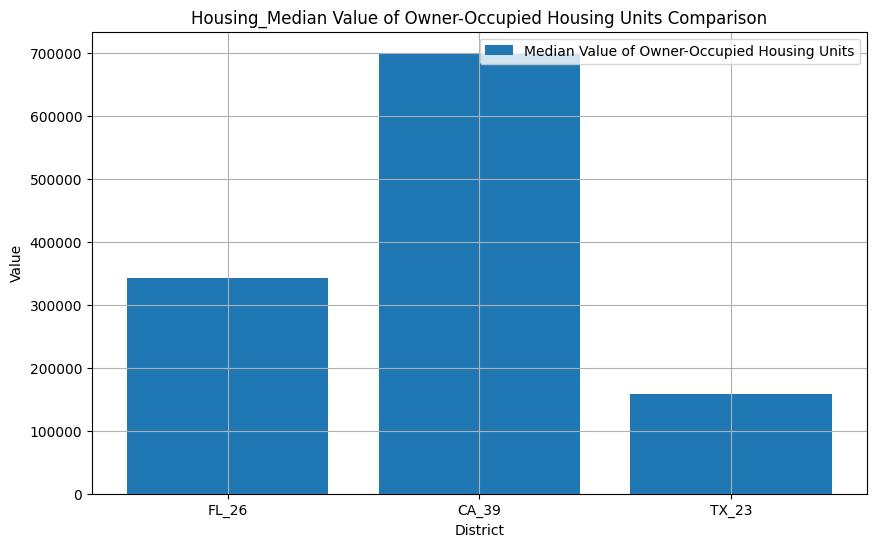

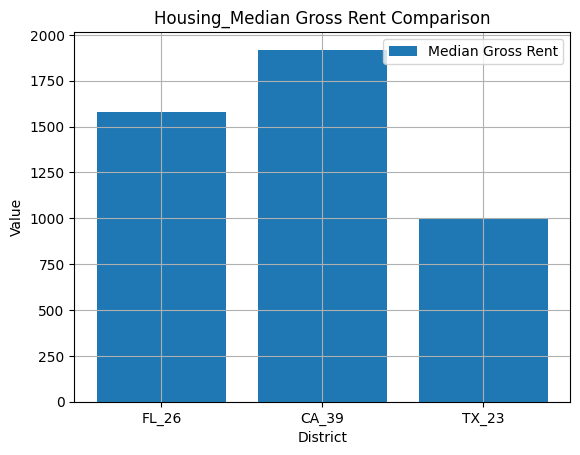

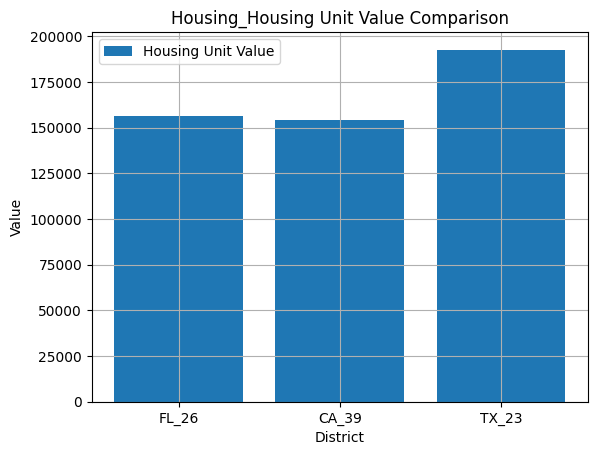

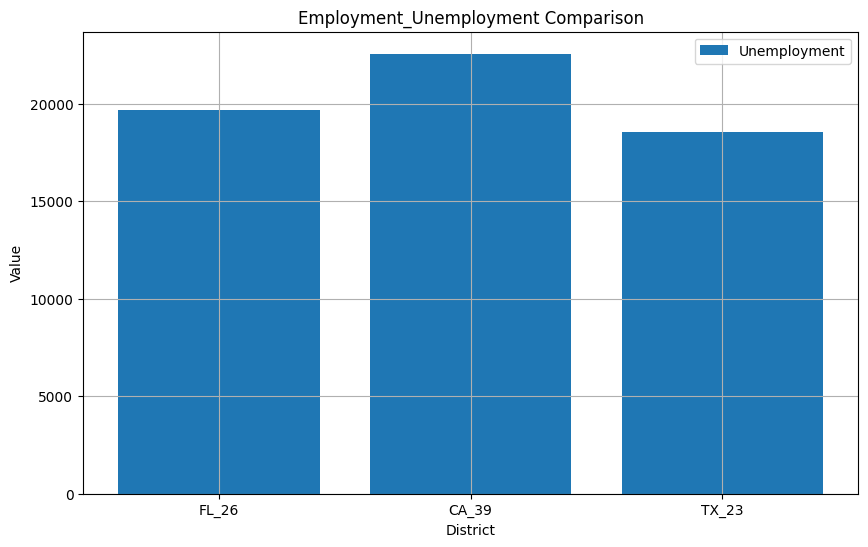

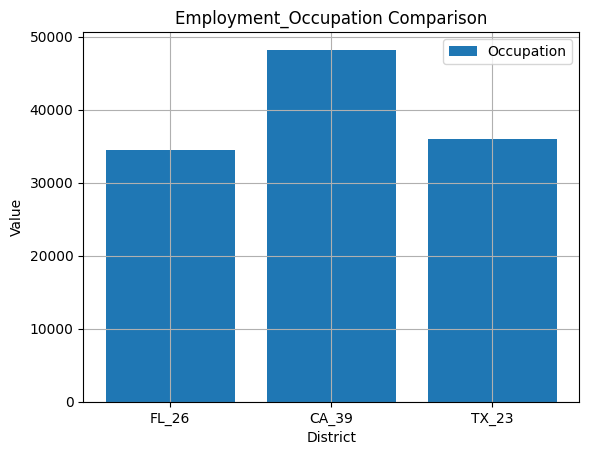

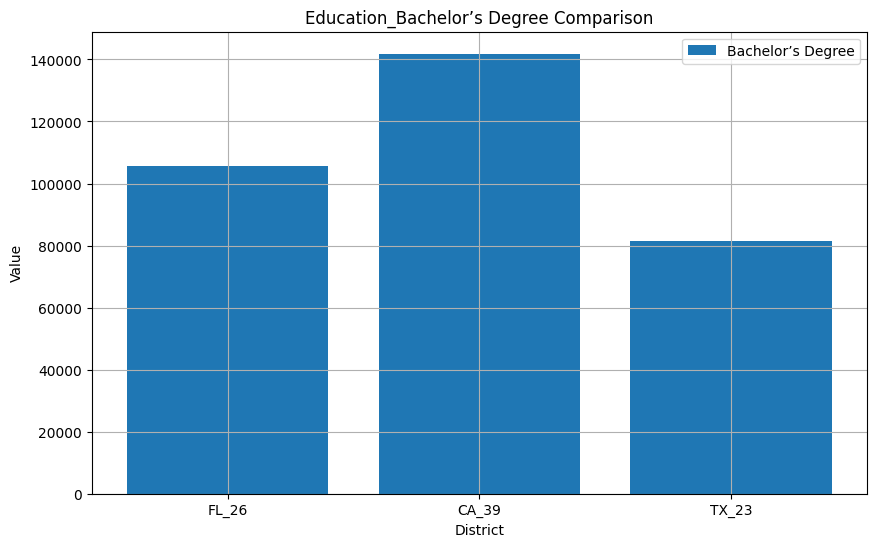

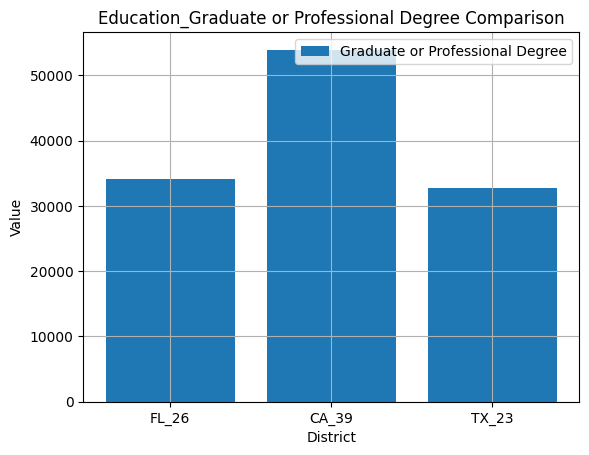

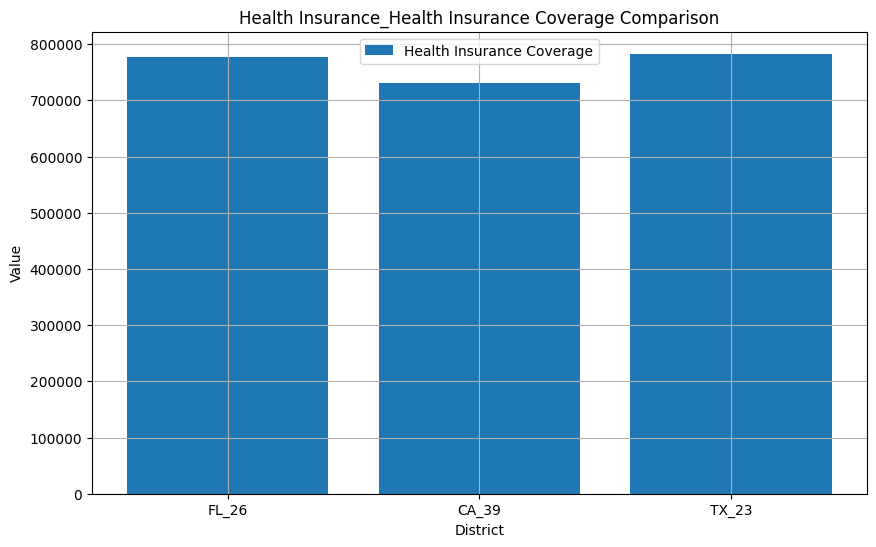

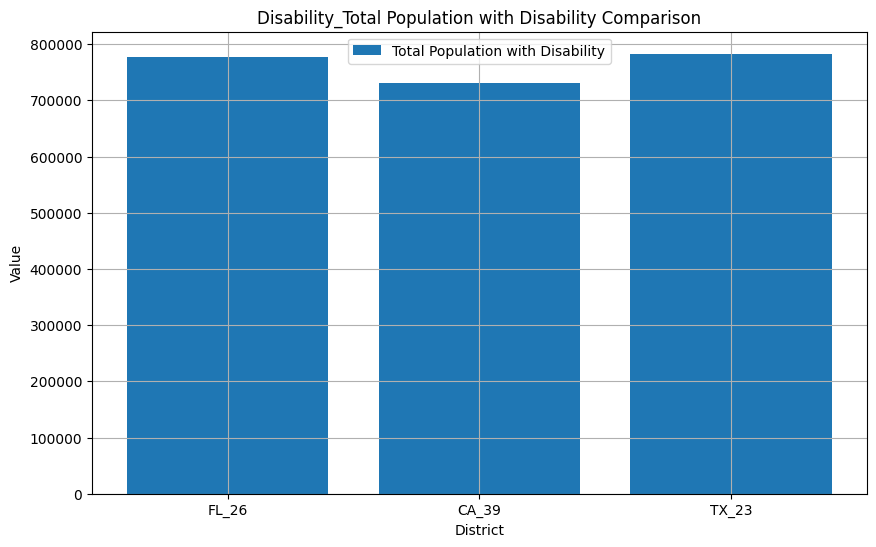

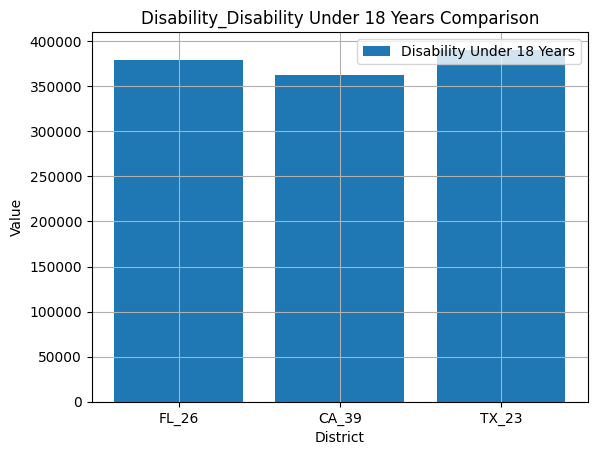

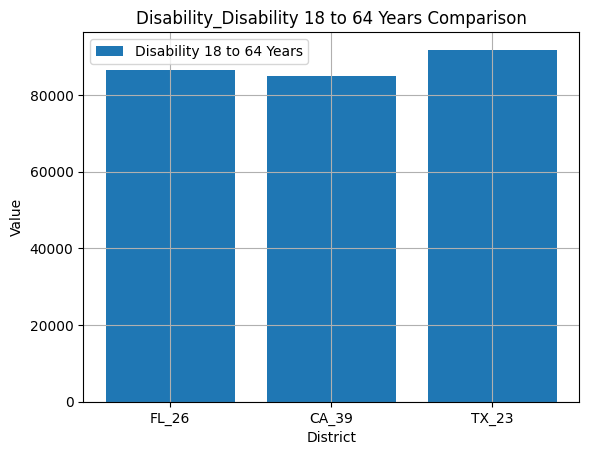

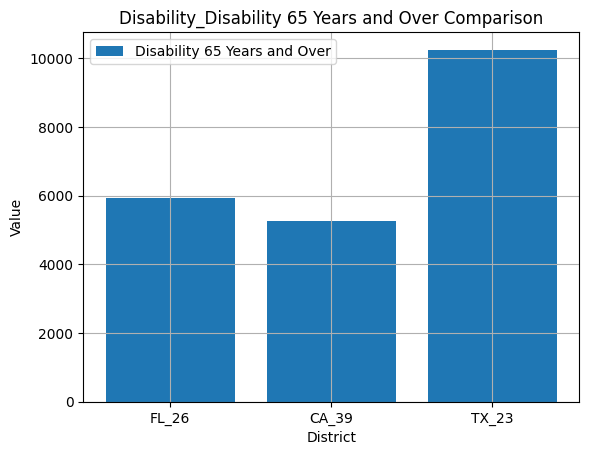

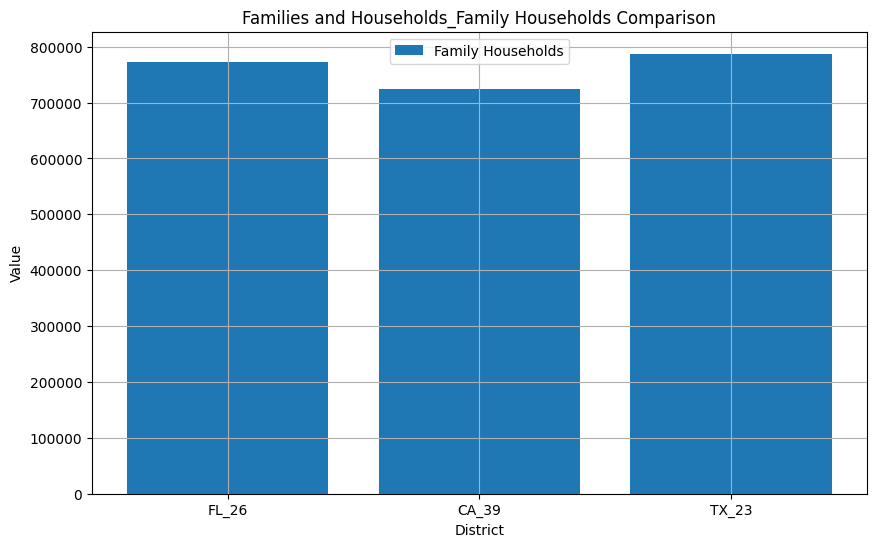

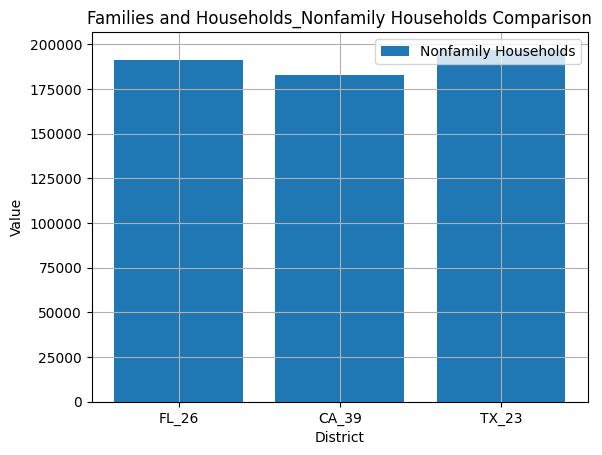

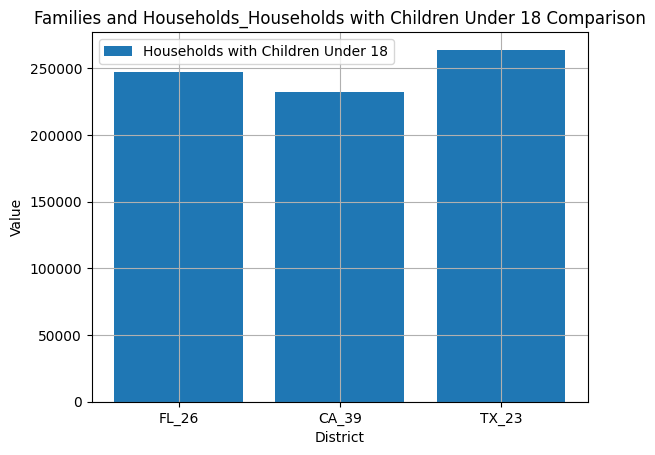

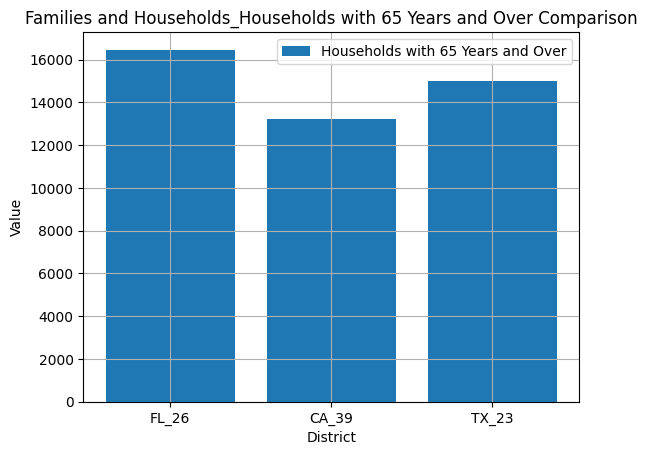

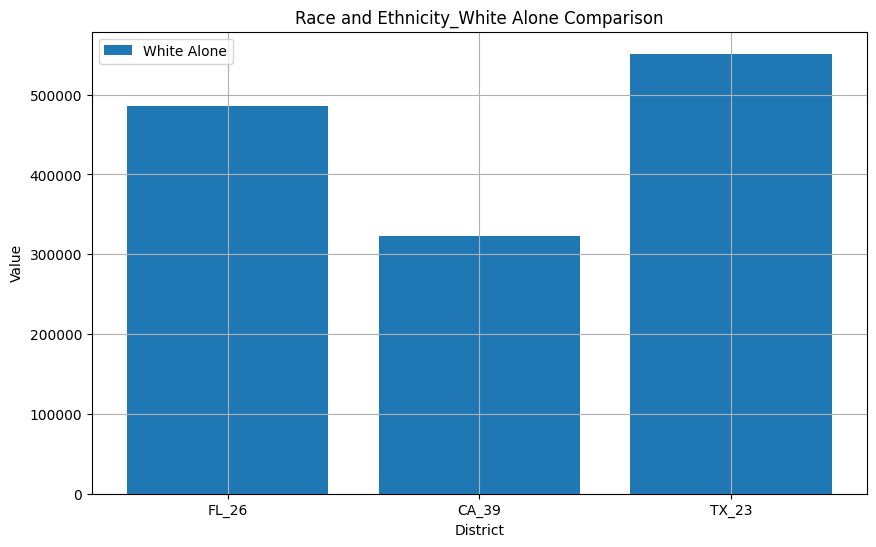

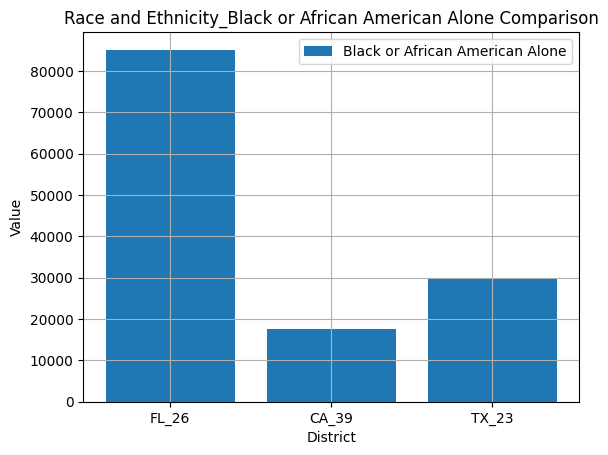

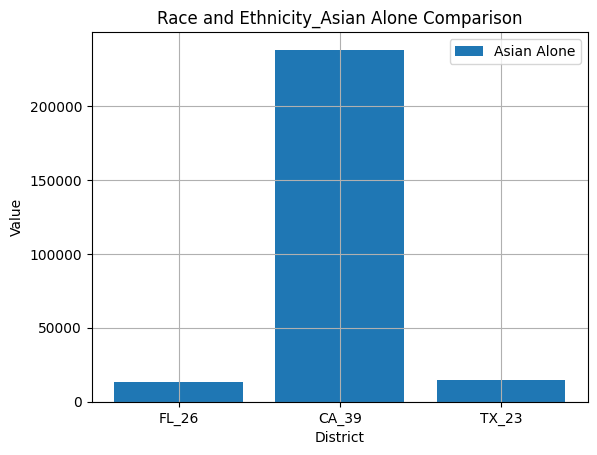

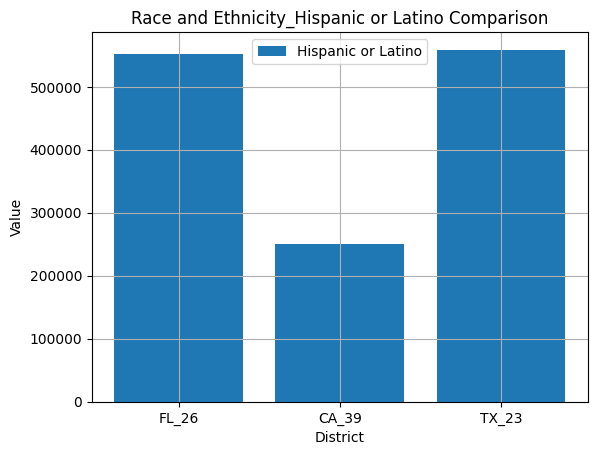

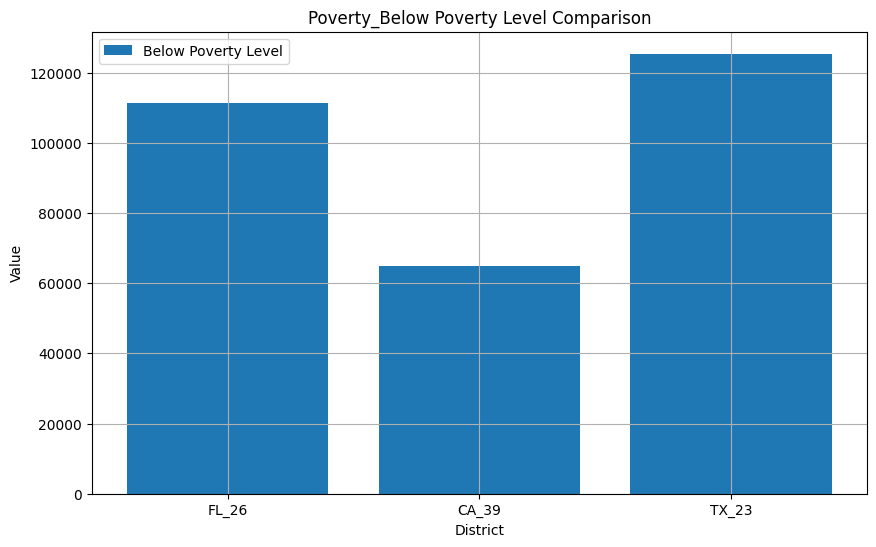

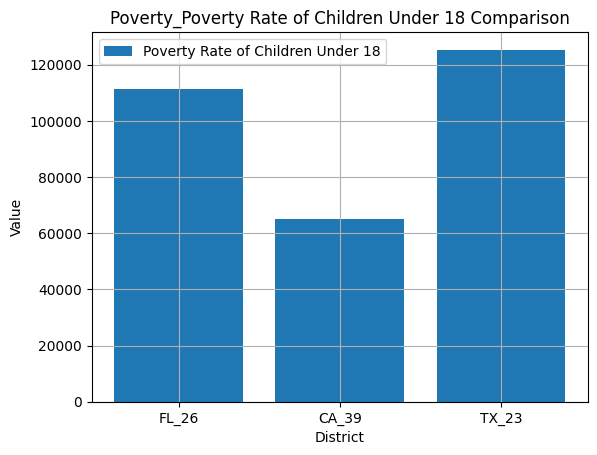

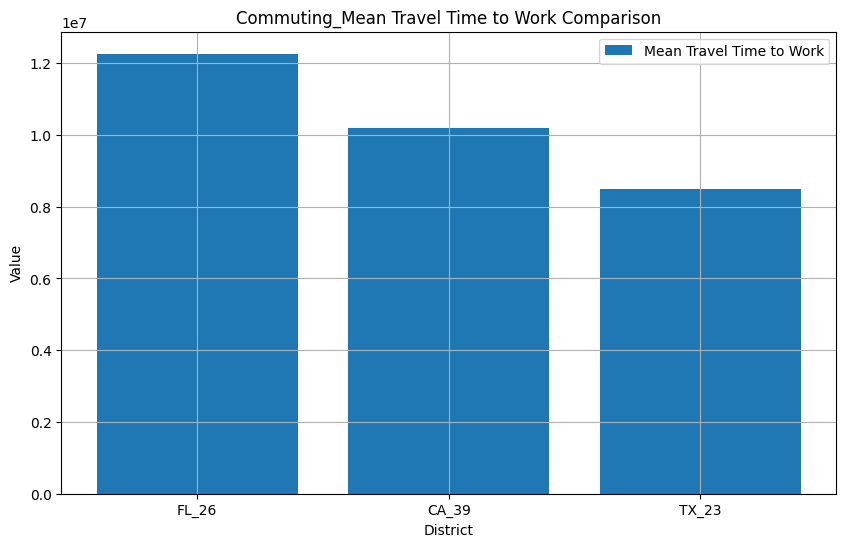

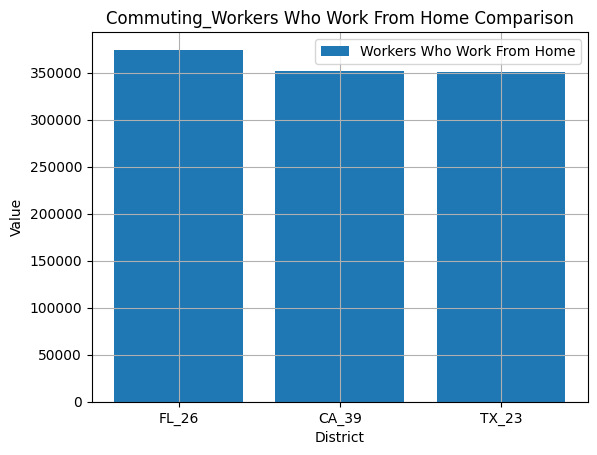

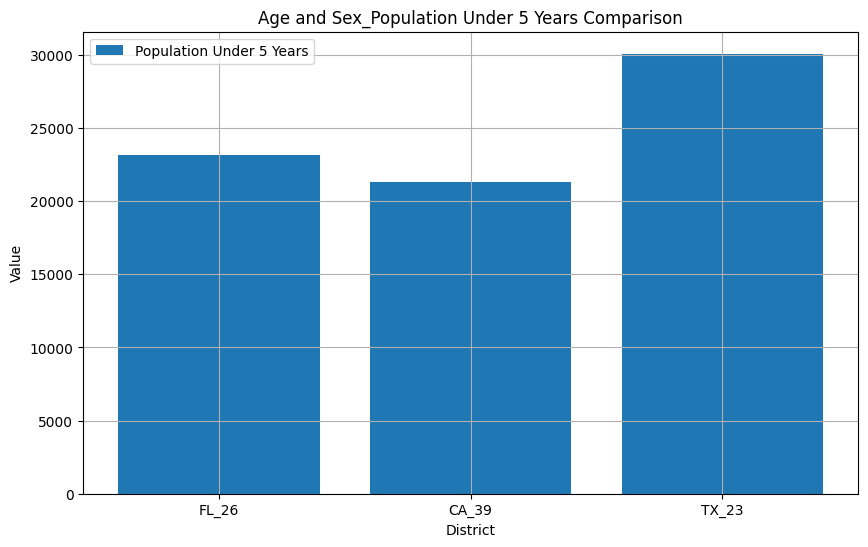

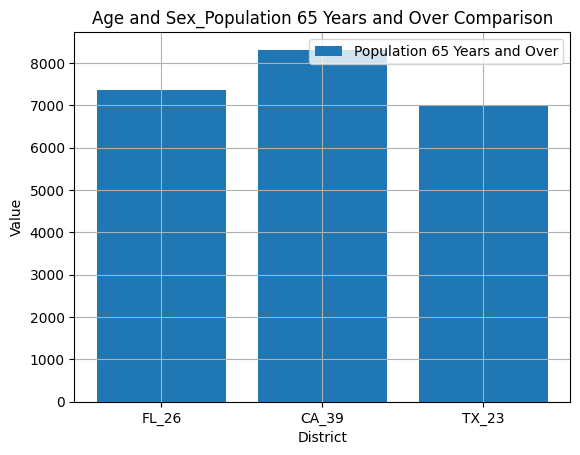

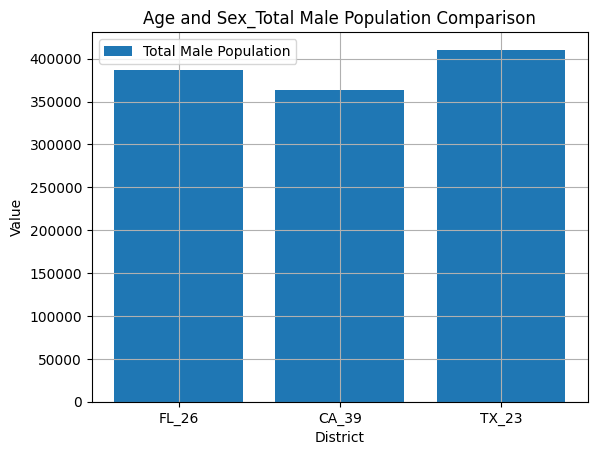

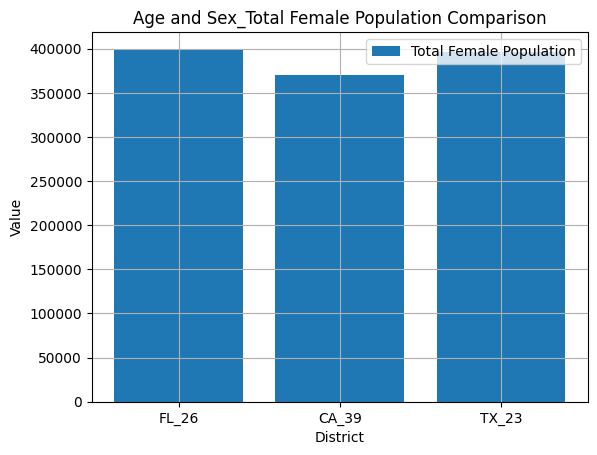

In [ ]:
import matplotlib.pyplot as plt

# Define the data for each category
categories = {
    'Housing': {
        'Median Value of Owner-Occupied Housing Units': [342800, 698900, 158200],
        'Median Gross Rent': [1580, 1919, 1003],
        'Housing Unit Value': [156379, 154058, 192629]
    },
    'Employment': {
        'Unemployment': [19685, 22556, 18540],
        'Occupation': [34530, 48214, 36029]
    },
    'Education': {
        'Bachelor’s Degree': [105807, 141849, 81458],
        'Graduate or Professional Degree': [34179, 53930, 32808]
    },
    'Health Insurance': {
        'Health Insurance Coverage': [776866, 731073, 782957]
    },
    'Disability': {
        'Total Population with Disability': [776866, 731073, 782957],
        'Disability Under 18 Years': [379385, 362353, 390613],
        'Disability 18 to 64 Years': [86488, 85036, 91844],
        'Disability 65 Years and Over': [5940, 5274, 10254]
    },
    'Families and Households': {
        'Family Households': [772183, 724693, 787520],
        'Nonfamily Households': [191045, 182615, 196963],
        'Households with Children Under 18': [246796, 232129, 263821],
        'Households with 65 Years and Over': [16459, 13208, 15014]
    },
    'Race and Ethnicity': {
        'White Alone': [485212, 322602, 551203],
        'Black or African American Alone': [85171, 17677, 30026],
        'Asian Alone': [13461, 237986, 14752],
        'Hispanic or Latino': [551843, 250624, 558860]
    },
    'Poverty': {
        'Below Poverty Level': [111416, 64968, 125362],
        'Poverty Rate of Children Under 18': [111416, 64968, 125362]
    },
    'Commuting': {
        'Mean Travel Time to Work': [12263045, 10179560, 8503615],
        'Workers Who Work From Home': [374318, 351392, 350298]
    },
    'Age and Sex': {
        'Population Under 5 Years': [23170, 21335, 30086],
        'Population 65 Years and Over': [7375, 8317, 6979],
        'Total Male Population': [386358, 363514, 410377],
        'Total Female Population': [398920, 369817, 395868]
    }
}

# Create plots
for category, data in categories.items():
    plt.figure(figsize=(10, 6))
    for subcategory, values in data.items():
      plt.bar([f'{dt}' for dt in ['FL_26', 'CA_39', 'TX_23']], values, label=subcategory)

      plt.xlabel('District')
      plt.ylabel('Value')
      plt.title(f'{category}_{subcategory} Comparison')
      plt.legend()
      plt.grid(True)
      plt.show()

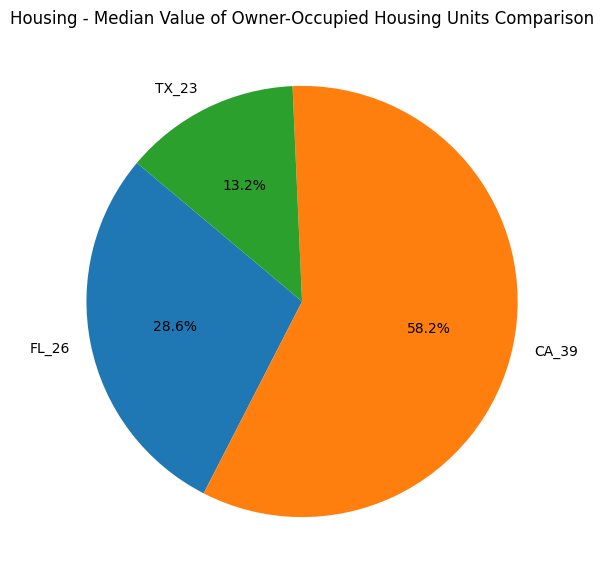

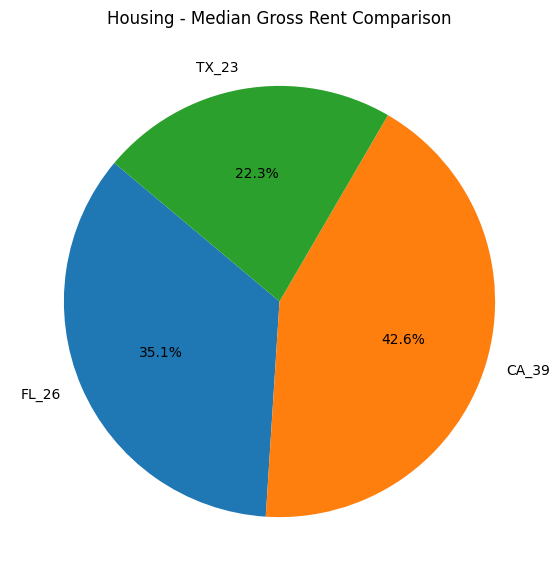

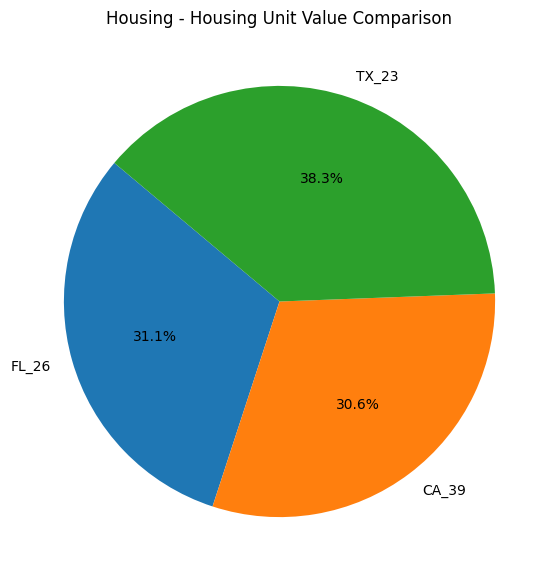

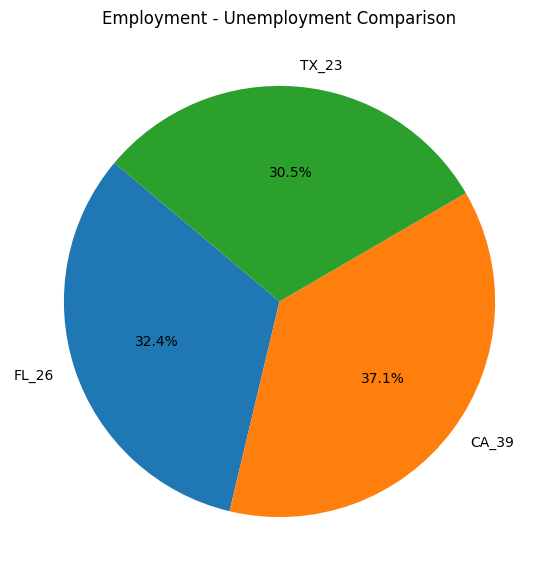

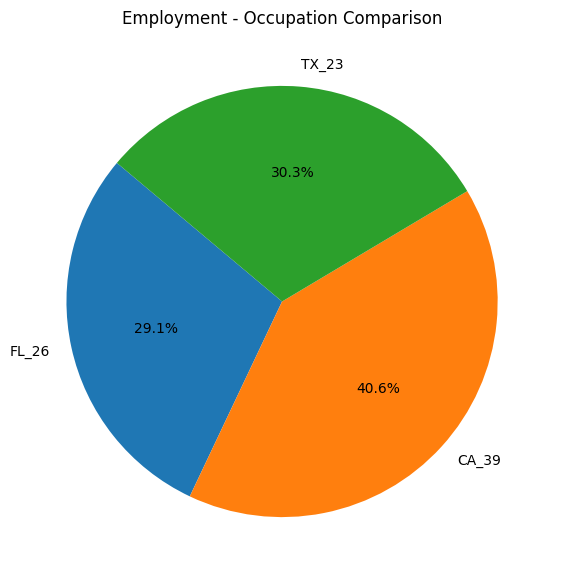

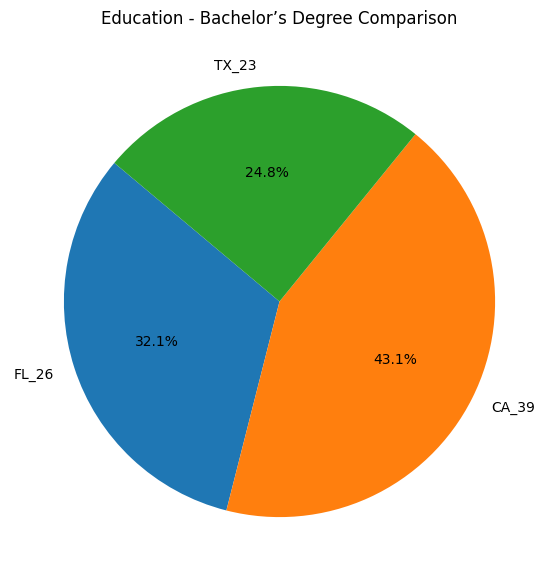

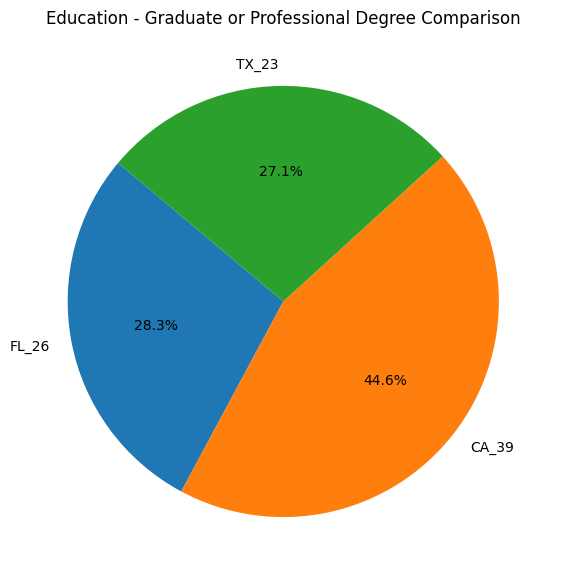

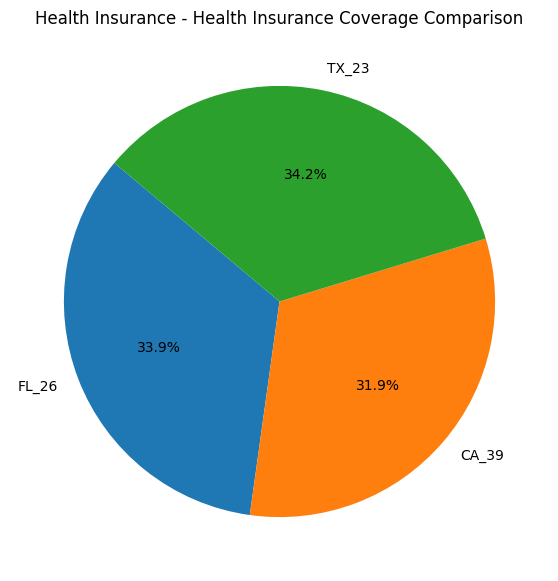

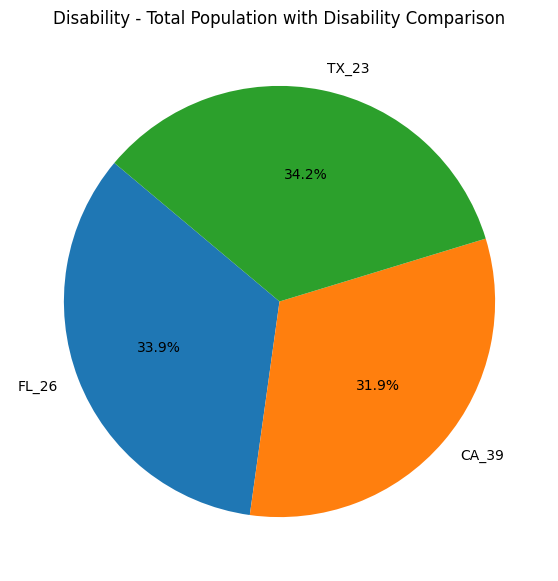

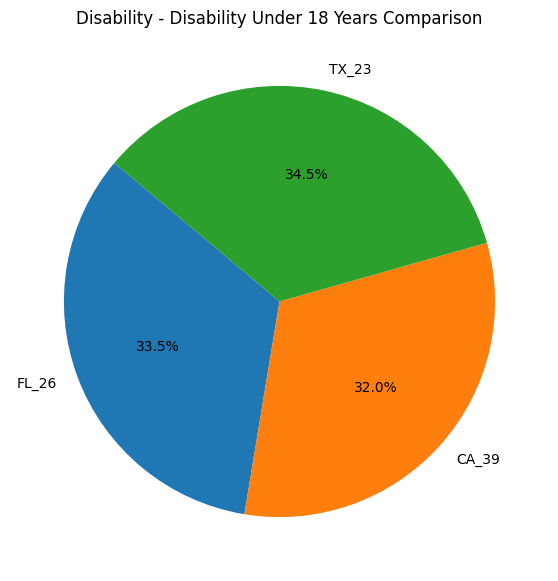

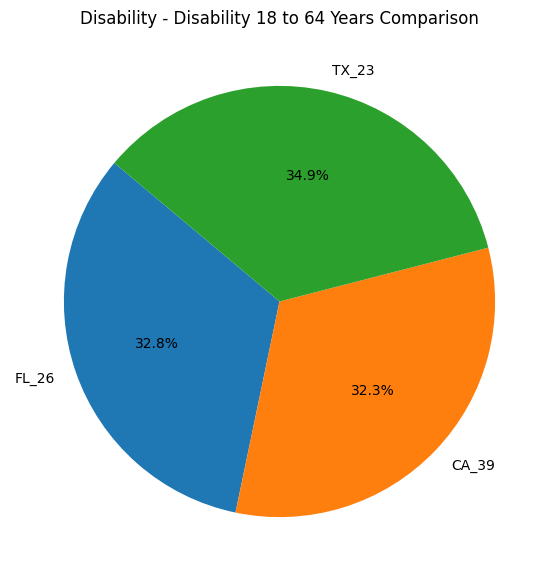

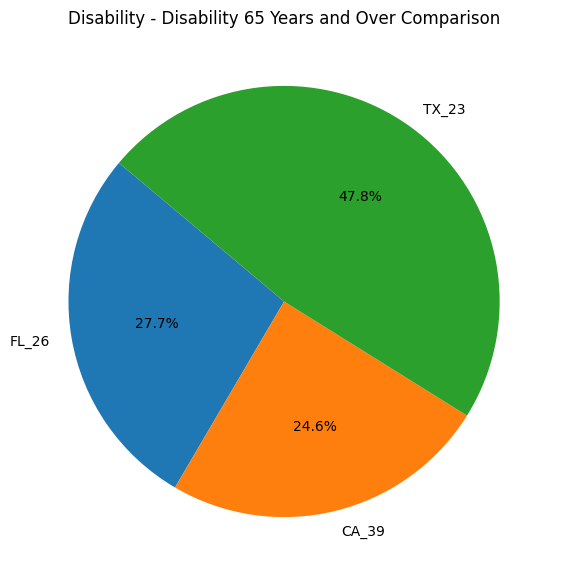

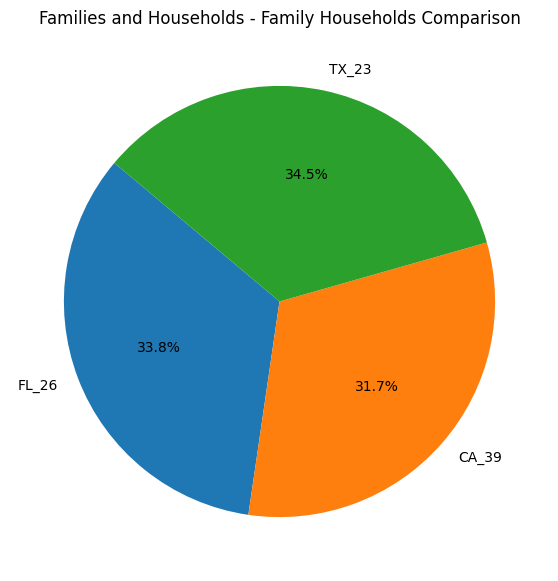

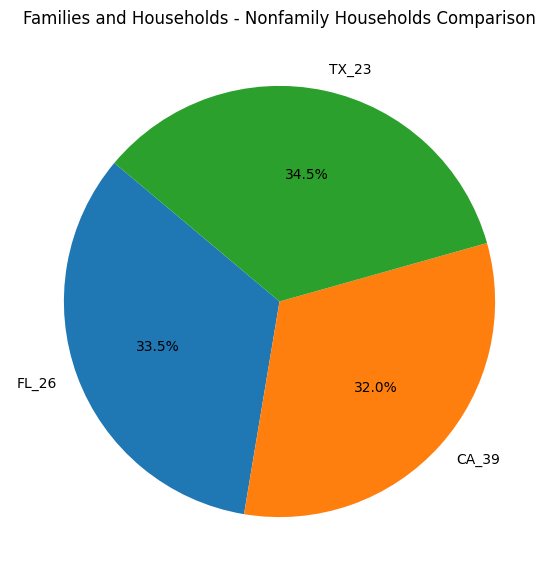

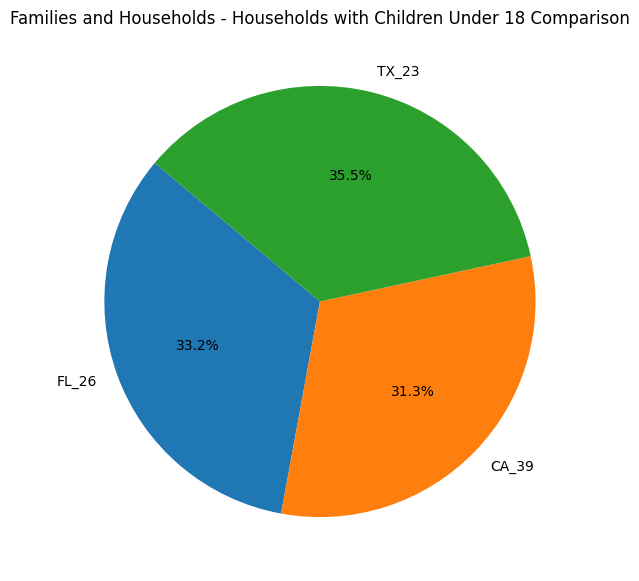

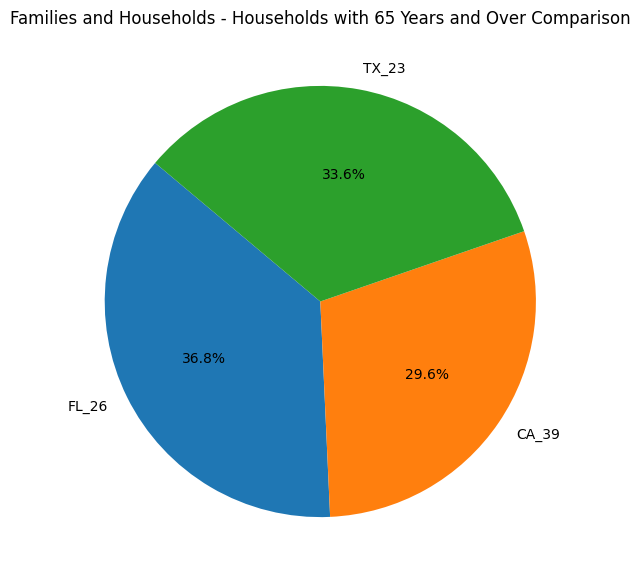

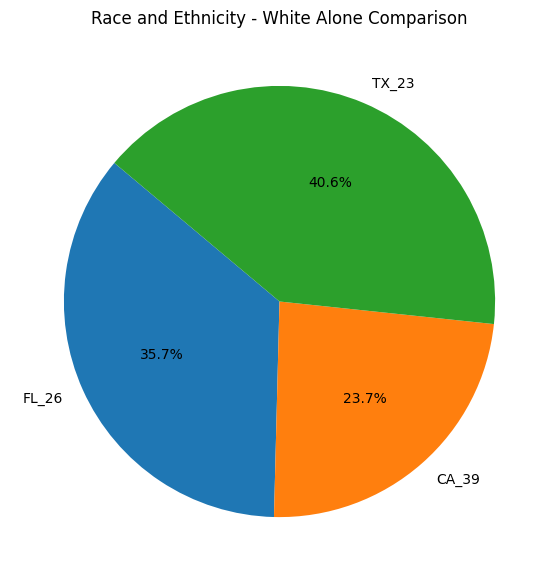

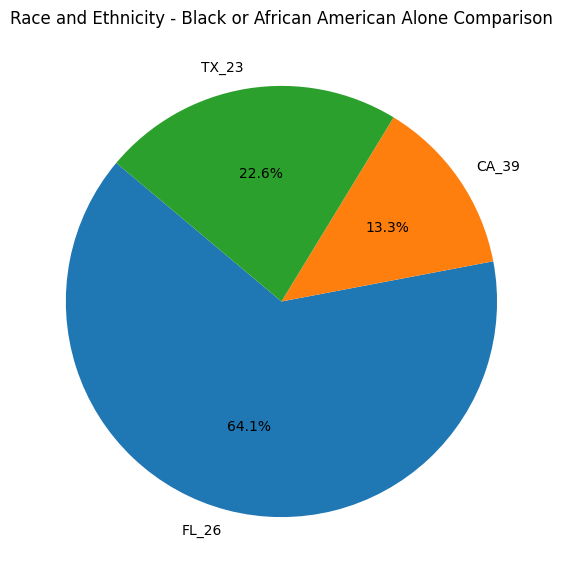

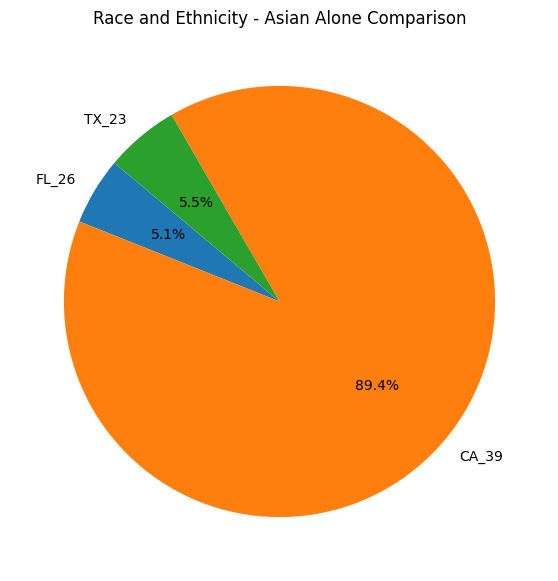

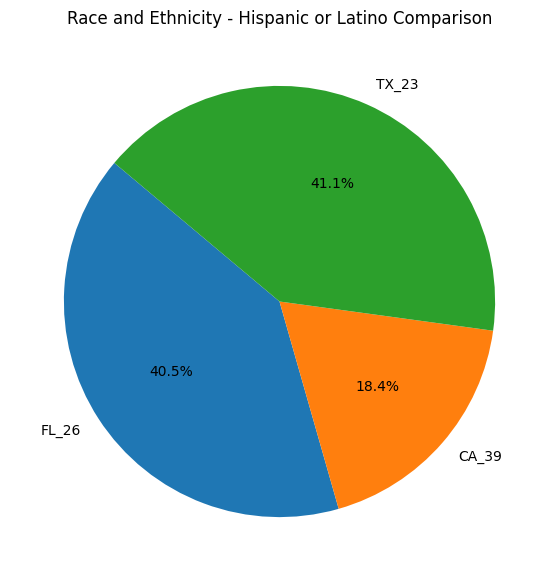

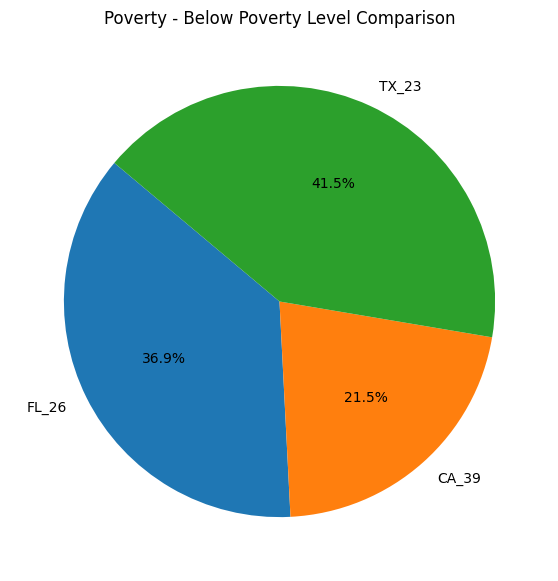

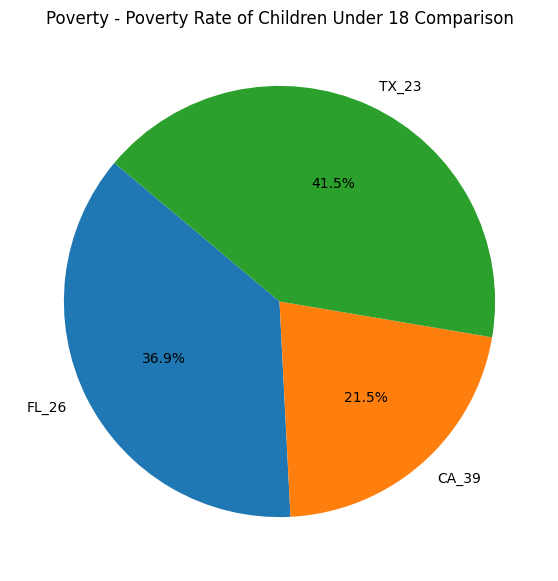

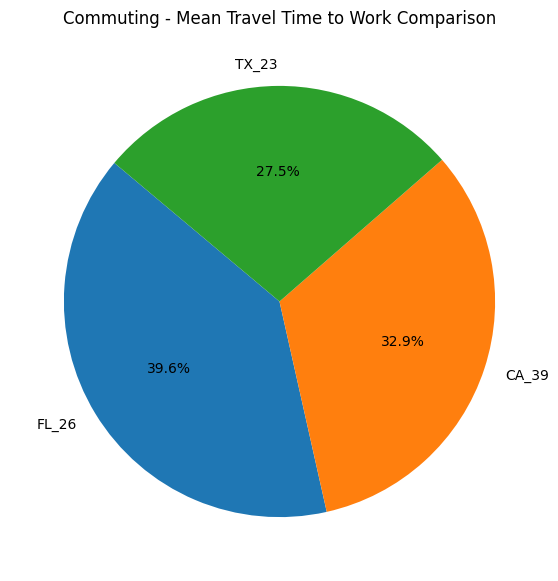

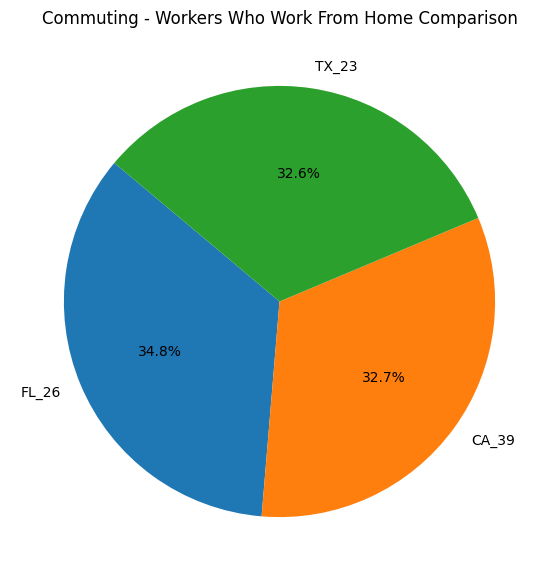

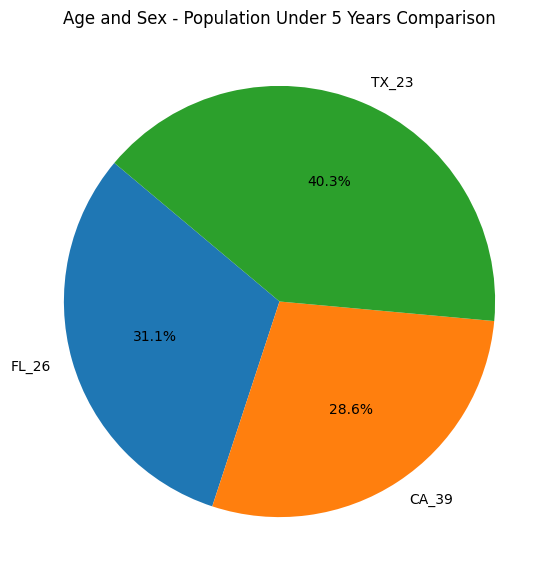

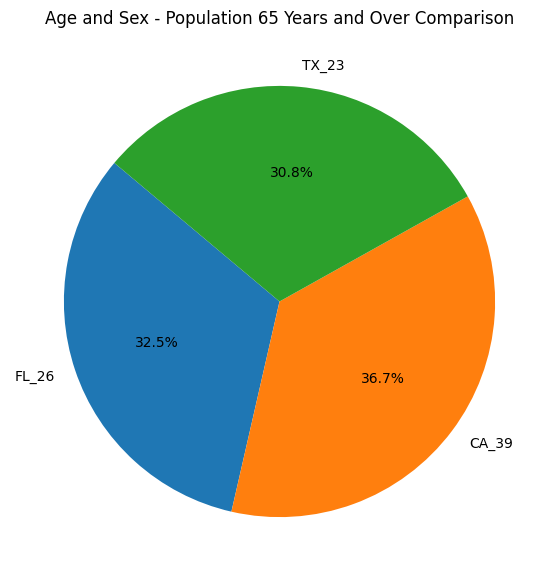

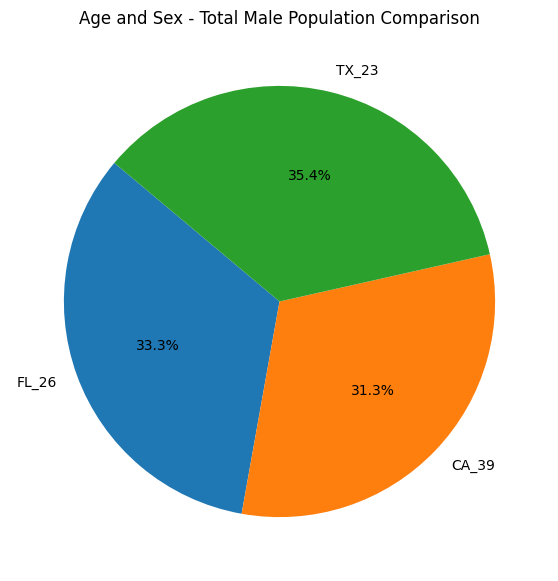

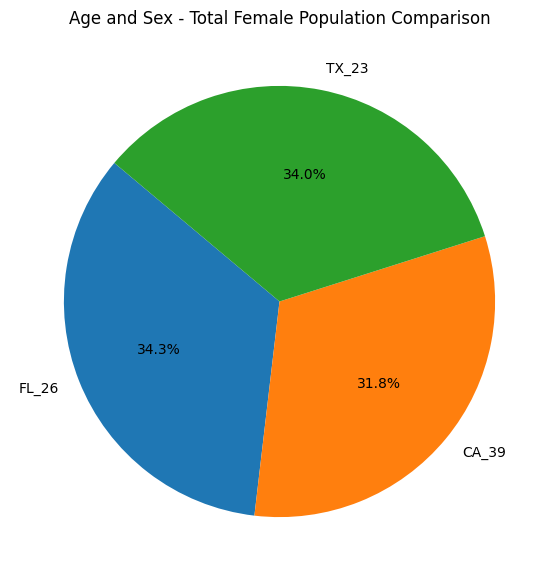

In [ ]:
import matplotlib.pyplot as plt

# Define the data for each category
categories = {
    'Housing': {
        'Median Value of Owner-Occupied Housing Units': [342800, 698900, 158200],
        'Median Gross Rent': [1580, 1919, 1003],
        'Housing Unit Value': [156379, 154058, 192629]
    },
    'Employment': {
        'Unemployment': [19685, 22556, 18540],
        'Occupation': [34530, 48214, 36029]
    },
    'Education': {
        'Bachelor’s Degree': [105807, 141849, 81458],
        'Graduate or Professional Degree': [34179, 53930, 32808]
    },
    'Health Insurance': {
        'Health Insurance Coverage': [776866, 731073, 782957]
    },
    'Disability': {
        'Total Population with Disability': [776866, 731073, 782957],
        'Disability Under 18 Years': [379385, 362353, 390613],
        'Disability 18 to 64 Years': [86488, 85036, 91844],
        'Disability 65 Years and Over': [5940, 5274, 10254]
    },
    'Families and Households': {
        'Family Households': [772183, 724693, 787520],
        'Nonfamily Households': [191045, 182615, 196963],
        'Households with Children Under 18': [246796, 232129, 263821],
        'Households with 65 Years and Over': [16459, 13208, 15014]
    },
    'Race and Ethnicity': {
        'White Alone': [485212, 322602, 551203],
        'Black or African American Alone': [85171, 17677, 30026],
        'Asian Alone': [13461, 237986, 14752],
        'Hispanic or Latino': [551843, 250624, 558860]
    },
    'Poverty': {
        'Below Poverty Level': [111416, 64968, 125362],
        'Poverty Rate of Children Under 18': [111416, 64968, 125362]
    },
    'Commuting': {
        'Mean Travel Time to Work': [12263045, 10179560, 8503615],
        'Workers Who Work From Home': [374318, 351392, 350298]
    },
    'Age and Sex': {
        'Population Under 5 Years': [23170, 21335, 30086],
        'Population 65 Years and Over': [7375, 8317, 6979],
        'Total Male Population': [386358, 363514, 410377],
        'Total Female Population': [398920, 369817, 395868]
    }
}

# District labels
district_names = ['FL_26', 'CA_39', 'TX_23']

# Create pie charts
for category, data in categories.items():
    for subcategory, values in data.items():
        plt.figure(figsize=(7, 7))  # Create a figure
        plt.pie(values, labels=district_names, autopct='%1.1f%%', startangle=140)
        plt.title(f'{category} - {subcategory} Comparison')
        plt.show()

Euclidean Distance Matrix:
District     FL_26     CA_39     TX_23
District                              
FL_26     0.000000  2.313871  1.251767
CA_39     2.313871  0.000000  2.834339
TX_23     1.251767  2.834339  0.000000

Top 5 districts similar to FL_26:
District
TX_23    1.251767
CA_39    2.313871
Name: FL_26, dtype: float64


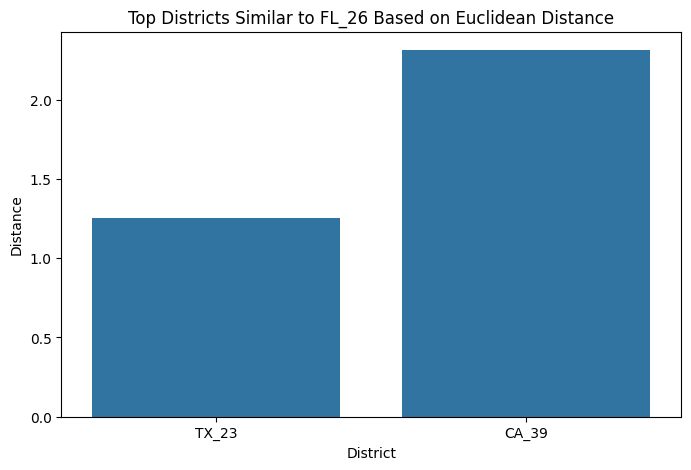

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define the dataset (districts and features)
data = {
    'District': ['FL_26', 'CA_39', 'TX_23'],
    'Median Household Income': [65877, 100743, 63224],
    'Unemployment': [19685, 22556, 18540],
    'Below Poverty Level': [111416, 64968, 125362],
    'Bachelor’s Degree': [105807, 141849, 81458],
    'White Alone': [485212, 322602, 551203],
    'Black or African American Alone': [85171, 17677, 30026],
    'Hispanic or Latino': [551843, 250624, 558860],
    'Median Home Value': [342800, 698900, 158200],
    'Median Gross Rent': [1580, 1919, 1003]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Step 2: Normalize the data (MinMax Scaling)
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, 1:]), columns=df.columns[1:], index=df['District'])

# Step 3: Calculate Euclidean distances between FL_26 and other districts
distance_matrix = euclidean_distances(df_scaled)
distance_df = pd.DataFrame(distance_matrix, index=df['District'], columns=df['District'])

# Display the distance matrix
print("Euclidean Distance Matrix:")
print(distance_df)

# Step 4: Identify the 5 closest districts to FL_26 (excluding FL_26 itself)
fl_26_distances = distance_df.loc['FL_26'].sort_values()[1:6]
print("\nTop 5 districts similar to FL_26:")
print(fl_26_distances)

# Step 5: Visualize the distances
plt.figure(figsize=(8, 5))
sns.barplot(x=fl_26_distances.index, y=fl_26_distances.values)
plt.title('Top Districts Similar to FL_26 Based on Euclidean Distance')
plt.ylabel('Distance')
plt.show()

# Get ALL Districts

In [ ]:
import requests

def get_census_data(state_code, district_number):
    API_KEY = '37cf2563e369844f2bf2c1cb2b0bedfd8f232d5d'
    BASE_URL = "https://api.census.gov/data/2021/acs/acs5"

    params = {
        'get': ','.join([
            'NAME', 'B01003_001E', 'B02001_002E', 'B02001_003E', 'B19013_001E',
            'B15003_022E', 'B23025_005E', 'B17001_002E', 'B25077_001E',
            'B11001_001E', 'B01002_001E', 'B03002_003E', 'B03002_004E',
            'B03002_012E', 'B25001_001E', 'B25002_001E', 'B25002_003E',
            'B25064_001E', 'B25075_001E', 'B23025_003E', 'B24011_001E',
            'B08013_001E', 'B14001_002E', 'B15003_017E', 'B15003_023E',
            'B27001_001E', 'B27010_001E', 'B18101_001E', 'B18101_002E',
            'B18101_009E', 'B18101_016E', 'B11002_001E', 'B11003_001E',
            'B11012_001E', 'B11013_001E', 'B02001_005E', 'B02001_007E',
            'B02001_006E', 'B17010_001E', 'B17020_002E', 'B08301_001E',
            'B08126_001E', 'B01001_002E', 'B01001_026E', 'B01001_003E',
            'B01001_020E'
        ]),
        'for': f'congressional district:{district_number}',
        'in': f'state:{state_code}',
        'key': API_KEY
    }

    response = requests.get(BASE_URL, params=params)

    dic = {}
    if response.status_code == 200:
        data = response.json()
        headers = data[0]
        values = data[1]

        for i in range(len(headers)):
            dic[headers[i]] = values[i]

        return dic
    else:
        print(f"Error: {response.status_code}")
        return None

# List of state codes and number of districts
states_and_districts = {
    '01': 7,    # Alabama
    '02': 1,    # Alaska
    '04': 9,    # Arizona
    '05': 4,    # Arkansas
    '06': 52,   # California
    '08': 8,    # Colorado
    '09': 5,    # Connecticut
    '10': 1,    # Delaware
    '11': 14,   # Georgia
    '12': 28,   # Florida
    '13': 1,    # Hawaii
    '16': 17,   # Illinois
    '17': 9,    # Indiana
    '18': 4,    # Iowa
    '19': 4,    # Kansas
    '20': 6,    # Kentucky
    '21': 6,    # Louisiana
    '22': 8,    # Maine
    '23': 8,    # Maryland
    '24': 9,    # Massachusetts
    '25': 13,   # Michigan
    '26': 8,    # Minnesota
    '27': 4,    # Mississippi
    '28': 8,    # Missouri
    '29': 1,    # Montana
    '30': 2,    # Nebraska
    '31': 4,    # Nevada
    '32': 2,    # New Hampshire
    '33': 12,   # New Jersey
    '34': 3,    # New Mexico
    '35': 26,   # New York
    '36': 14,   # North Carolina
    '37': 1,    # North Dakota
    '38': 15,   # Ohio
    '39': 5,    # Oklahoma
    '40': 6,    # Oregon
    '41': 17,   # Pennsylvania
    '44': 2,    # Rhode Island
    '45': 7,    # South Carolina
    '46': 1,    # South Dakota
    '47': 9,    # Tennessee
    '48': 38,   # Texas
    '49': 4,    # Utah
    '50': 11,   # Virginia
    '51': 10,   # Washington
    '53': 1,    # West Virginia
    '54': 8,    # Wisconsin
    '56': 1,    # Wyoming
    '72': 1     # Puerto Rico (non-voting delegate)
}

# Example usage: Now you can loop through the states and districts
all_districts_data = []

for state_code, num_districts in states_and_districts.items():

    for district_number in range(1, num_districts + 1):
        # print(f"State Code: {state_code}, District Number: {district_number}")
        district_data = get_census_data(state_code, district_number)
        if district_data:
            all_districts_data.append(district_data)

# Now `all_districts_data` will contain the census data for all districts in the U.S.

In [ ]:
all_districts_data

In [ ]:

import pandas as pd

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(all_districts_data)

# Display the DataFrame
print(df)

                                                 NAME B01003_001E B02001_002E  \
0   Congressional District 10 (116th Congress), Ca...      764549      473451   
1   Congressional District 11 (116th Congress), Ca...      767298      394083   
2   Congressional District 12 (116th Congress), Ca...      757251      345230   
3   Congressional District 13 (116th Congress), Ca...      772203      303169   
4   Congressional District 14 (116th Congress), Ca...      747495      301467   
..                                                ...         ...         ...   
89  Congressional District 33 (116th Congress), Texas      727423      354537   
90  Congressional District 34 (116th Congress), Texas      712253      527771   
91  Congressional District 35 (116th Congress), Texas      805089      495969   
92  Congressional District 36 (116th Congress), Texas      759111      567730   
93  Congressional District 10 (116th Congress), Vi...      869926      564567   

   B02001_003E B19013_001E 

In [ ]:
df.head()

,NAME,B01003_001E,B02001_002E,B02001_003E,B19013_001E,B15003_022E,B23025_005E,B17001_002E,B25077_001E,B11001_001E,...,B17010_001E,B17020_002E,B08301_001E,B08126_001E,B01001_002E,B01001_026E,B01001_003E,B01001_020E,state,congressional district
0,"Congressional District 10 (116th Congress), Ca...",764549,473451,25644,74420,63205,26859,95682,372700,240615,...,181217,95682,320490,320490,383649,380900,27719,7254,06,10
1,"Congressional District 11 (116th Congress), Ca...",767298,394083,59856,106592,149506,23371,67384,736800,274210,...,191360,67384,365698,365698,377624,389674,22212,8481,06,11
2,"Congressional District 12 (116th Congress), Ca...",757251,345230,40138,127278,219100,24772,78325,1204200,326916,...,147922,78325,442851,442851,389477,367774,17548,8522,06,12
3,"Congressional District 13 (116th Congress), Ca...",772203,303169,123072,92969,159146,25149,95022,835900,291910,...,162403,95022,399059,399059,377018,395185,20100,7923,06,13
4,"Congressional District 14 (116th Congress), Ca...",747495,301467,20936,129943,162492,20584,48940,1156600,257027,...,176805,48940,396969,396969,372447,375048,19570,8288,06,14


In [ ]:

# Rename the columns
df = df.rename(columns={
    'B01003_001E': 'Total population',
    'B02001_002E': 'White alone (race)',
    'B02001_003E': 'Black or African American alone (race)',
    'B19013_001E': 'Median household income',
    'B15003_022E': 'Bachelor\'s degree (Educational attainment)',
    'B23025_005E': 'Unemployment (16 years and over)',
    'B17001_002E': 'Below poverty level',
    'B25077_001E': 'Median value of owner-occupied housing units',
    'B11001_001E': 'Total number of households',
    'B01002_001E': 'Median age',
    'B03002_003E': 'White alone, not Hispanic or Latino',
    'B03002_004E': 'Black or African American alone, not Hispanic or Latino',
    'B03002_012E': 'Hispanic or Latino',

    # Housing
    'B25001_001E': 'Total housing units',
    'B25002_001E': 'Occupied housing units',
    'B25002_003E': 'Vacant housing units',
    'B25064_001E': 'Median gross rent',
    'B25075_001E': 'Housing unit value categories (owner-occupied)',

    # Employment
    'B23025_003E': 'Employed population (16 years and over)',
    'B24011_001E': 'Occupation for civilian employed population (16 years and over)',
    'B08013_001E': 'Mean travel time to work',

    # Education
    'B14001_002E': 'School enrollment (3 years and over)',
    'B15003_017E': 'High school graduate (25 years and over)',
    'B15003_023E': 'Graduate or professional degree (25 years and over)',

    # Health Insurance
    'B27001_001E': 'Health insurance coverage (civilian noninstitutionalized population)',
    'B27010_001E': 'Health insurance coverage by employment status (18 to 64 years)',

    # Disability
    'B18101_001E': 'Population with a disability (total population)',
    'B18101_002E': 'Population with a disability (under 18 years)',
    'B18101_009E': 'Population with a disability (18 to 64 years)',
    'B18101_016E': 'Population with a disability (65 years and over)',

    # Families and Households
    'B11002_001E': 'Family households',
    'B11003_001E': 'Nonfamily households',
    'B11012_001E': 'Households with children under 18',
    'B11013_001E': 'Households with people 65 years and over',

    # Race and Ethnicity (Additional)
    'B02001_005E': 'Asian alone (race)',
    'B02001_007E': 'American Indian and Alaska Native alone (race)',
    'B02001_006E': 'Native Hawaiian and Other Pacific Islander alone (race)',

    # Poverty (Additional)
    'B17010_001E': 'Families in poverty',
    'B17020_002E': 'Poverty rate of children under 18',

    # Commuting
    'B08301_001E': 'Means of transportation to work',
    'B08126_001E': 'Workers who work from home',

    # Age and Sex
    'B01001_002E': 'Total male population',
    'B01001_026E': 'Total female population',
    'B01001_003E': 'Population under 5 years',
    'B01001_020E': 'Population 65 years and over'
})

# Display the updated DataFrame with renamed columns
print(df)

                                                 NAME Total population  \
0   Congressional District 10 (116th Congress), Ca...           764549   
1   Congressional District 11 (116th Congress), Ca...           767298   
2   Congressional District 12 (116th Congress), Ca...           757251   
3   Congressional District 13 (116th Congress), Ca...           772203   
4   Congressional District 14 (116th Congress), Ca...           747495   
..                                                ...              ...   
89  Congressional District 33 (116th Congress), Texas           727423   
90  Congressional District 34 (116th Congress), Texas           712253   
91  Congressional District 35 (116th Congress), Texas           805089   
92  Congressional District 36 (116th Congress), Texas           759111   
93  Congressional District 10 (116th Congress), Vi...           869926   

   White alone (race) Black or African American alone (race)  \
0              473451                          

In [ ]:
df.to_csv('/content/drive/MyDrive/census_data.csv', index=False)

In [ ]:
# prompt: read /content/drive/MyDrive/census_data.csv to dataframe

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/census_data.csv')
df.head()

,NAME,Total population,White alone (race),Black or African American alone (race),Median household income,Bachelor's degree (Educational attainment),Unemployment (16 years and over),Below poverty level,Median value of owner-occupied housing units,Total number of households,...,Families in poverty,Poverty rate of children under 18,Means of transportation to work,Workers who work from home,Total male population,Total female population,Population under 5 years,Population 65 years and over,state,congressional district
0,"Congressional District 10 (116th Congress), Ca...",764549,473451,25644,74420,63205,26859,95682,372700,240615,...,181217,95682,320490,320490,383649,380900,27719,7254,6,10
1,"Congressional District 11 (116th Congress), Ca...",767298,394083,59856,106592,149506,23371,67384,736800,274210,...,191360,67384,365698,365698,377624,389674,22212,8481,6,11
2,"Congressional District 12 (116th Congress), Ca...",757251,345230,40138,127278,219100,24772,78325,1204200,326916,...,147922,78325,442851,442851,389477,367774,17548,8522,6,12
3,"Congressional District 13 (116th Congress), Ca...",772203,303169,123072,92969,159146,25149,95022,835900,291910,...,162403,95022,399059,399059,377018,395185,20100,7923,6,13
4,"Congressional District 14 (116th Congress), Ca...",747495,301467,20936,129943,162492,20584,48940,1156600,257027,...,176805,48940,396969,396969,372447,375048,19570,8288,6,14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 48 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   NAME                                                                  94 non-null     object 
 1   Total population                                                      94 non-null     int64  
 2   White alone (race)                                                    94 non-null     int64  
 3   Black or African American alone (race)                                94 non-null     int64  
 4   Median household income                                               94 non-null     int64  
 5   Bachelor's degree (Educational attainment)                            94 non-null     int64  
 6   Unemployment (16 years and over)                                      94 non-null     int64  
 7   B

In [ ]:
df.describe()

,Total population,White alone (race),Black or African American alone (race),Median household income,Bachelor's degree (Educational attainment),Unemployment (16 years and over),Below poverty level,Median value of owner-occupied housing units,Total number of households,Median age,...,Families in poverty,Poverty rate of children under 18,Means of transportation to work,Workers who work from home,Total male population,Total female population,Population under 5 years,Population 65 years and over,state,congressional district
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,9.400000e+01,94.000000,94.000000,...,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,769051.638298,445010.297872,72522.308511,77549.478723,111817.021277,23108.457447,99429.234043,4.642904e+05,270040.021277,37.553191,...,181361.265957,99429.234043,358326.351064,358326.351064,382518.734043,386532.904255,23989.074468,7561.329787,21.287234,25.074468
std,52103.876300,127246.445517,73045.096322,24761.730565,44672.410277,4960.436479,34421.712741,3.125321e+05,41729.024075,4.752288,...,22971.379660,34421.712741,44390.564968,44390.564968,25596.795565,28192.576891,4339.481038,1558.439490,18.789509,11.472491
min,700867.000000,188022.000000,8938.000000,44413.000000,28487.000000,13904.000000,36102.000000,8.920000e+04,180557.000000,30.300000,...,142090.000000,36102.000000,257257.000000,257257.000000,345166.000000,334435.000000,15669.000000,5152.000000,6.000000,10.000000
25%,733336.500000,327675.250000,28023.000000,59141.250000,78567.750000,19286.500000,77548.250000,2.304500e+05,241327.000000,34.425000,...,164905.000000,77548.250000,331796.000000,331796.000000,369309.000000,366430.000000,20214.000000,6716.750000,6.000000,15.250000
50%,761235.000000,473575.000000,47149.000000,70759.000000,103831.000000,22659.500000,94423.000000,3.430000e+05,269363.500000,36.850000,...,180186.500000,94423.000000,350352.000000,350352.000000,377181.000000,380756.500000,24009.000000,7354.000000,12.000000,23.000000
75%,789738.750000,527845.250000,99757.750000,87176.500000,144972.000000,25532.500000,118815.250000,6.320000e+05,297966.250000,39.250000,...,192077.500000,118815.250000,378451.000000,378451.000000,392064.000000,400751.250000,27305.250000,8003.500000,48.000000,32.750000
max,961113.000000,674855.000000,418525.000000,157239.000000,224039.000000,43244.000000,193072.000000,1.583400e+06,369219.000000,55.100000,...,250912.000000,193072.000000,481239.000000,481239.000000,478601.000000,482512.000000,33909.000000,13389.000000,51.000000,52.000000


Euclidean Distance Matrix:
NAME                                                Congressional District 10 (116th Congress), California  \
NAME                                                                                                         
Congressional District 10 (116th Congress), Cal...                                           0.000000        
Congressional District 11 (116th Congress), Cal...                                           1.224960        
Congressional District 12 (116th Congress), Cal...                                           2.392684        
Congressional District 13 (116th Congress), Cal...                                           1.514567        
Congressional District 14 (116th Congress), Cal...                                           1.772341        
...                                                                                               ...        
Congressional District 33 (116th Congress), Texas                                            

<ipython-input-28-4431492213db>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('No.', i+1, ': ', fl_26_distances.index[i], fl_26_distances[i])


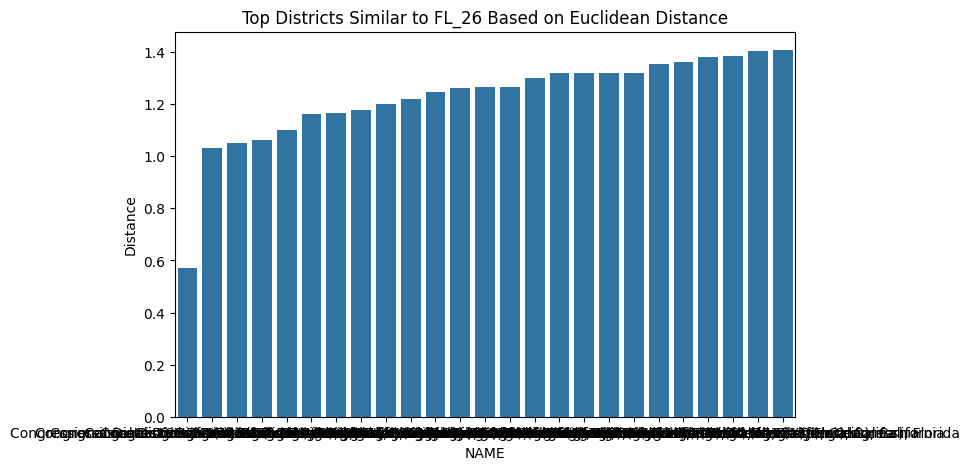

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Normalize the data (MinMax Scaling)
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, 1:]), columns=df.columns[1:], index=df['NAME'])

# Step 3: Calculate Euclidean distances between FL_26 and other districts
distance_matrix = euclidean_distances(df_scaled)
distance_df = pd.DataFrame(distance_matrix, index=df['NAME'], columns=df['NAME'])

# Display the distance matrix
print("Euclidean Distance Matrix:")
print(distance_df)

# Step 4: Identify the 5 closest districts to FL_26 (excluding FL_26 itself)
# Check if the index exists using print(distance_df.index)
# If the index is not found, it might be due to leading/trailing spaces or different casing
# You can try using str.strip() and str.lower() to clean the index values
fl_26_distances = distance_df.loc['Congressional District 26 (116th Congress), Florida'].sort_values()[1:26]
print("\nTop 20 districts similar to FL_26:")
for i in range(len(fl_26_distances)):
  print('No.', i+1, ': ', fl_26_distances.index[i], fl_26_distances[i])

# Step 5: Visualize the distances
plt.figure(figsize=(8, 5))
sns.barplot(x=fl_26_distances.index, y=fl_26_distances.values)
plt.title('Top Districts Similar to FL_26 Based on Euclidean Distance')
plt.ylabel('Distance')
plt.show()

In [ ]:
# prompt: filter df by NAME = Congressional District 26 (116th Congress), Florida

filtered_df = df[df['NAME'] == 'Congressional District 26 (116th Congress), Florida']
filtered_df

,NAME,Total population,White alone (race),Black or African American alone (race),Median household income,...,Total female population,Population under 5 years,Population 65 years and over,state,congressional district
59,"Congressional District 26 (116th Congress), Fl...",785278,485212,85171,65877,...,398920,23170,7375,12,26


In [ ]:
# prompt: convert fl_26_distances to data frame

fl_26_distances_df = fl_26_distances.to_frame(name='Distance')
fl_26_distances_df

,Distance
NAME,
"Congressional District 25 (116th Congress), Florida",0.570014
"Congressional District 27 (116th Congress), Florida",1.030656
"Congressional District 25 (116th Congress), California",1.051950
"Congressional District 23 (116th Congress), Florida",1.060645
"Congressional District 31 (116th Congress), California",1.101692
"Congressional District 15 (116th Congress), Florida",1.163046
"Congressional District 14 (116th Congress), Florida",1.164371
"Congressional District 10 (116th Congress), California",1.178478
"Congressional District 22 (116th Congress), California",1.201037


In [ ]:
# prompt: remove first two columns 'NAME' from fl_26_distances_df

fl_26_distances_df = fl_26_distances_df.iloc[:, 1:]
fl_26_distances_df

,NAME,Distance
index,,
0,"Congressional District 25 (116th Congress), Fl...",0.570014
1,"Congressional District 27 (116th Congress), Fl...",1.030656
2,"Congressional District 25 (116th Congress), Ca...",1.051950
3,"Congressional District 23 (116th Congress), Fl...",1.060645
4,"Congressional District 31 (116th Congress), Ca...",1.101692
5,"Congressional District 15 (116th Congress), Fl...",1.163046
6,"Congressional District 14 (116th Congress), Fl...",1.164371
7,"Congressional District 10 (116th Congress), Ca...",1.178478
8,"Congressional District 22 (116th Congress), Ca...",1.201037


In [ ]:
fl_26_distances_df.to_csv('/content/drive/MyDrive/fl_26_distances_TOP_20.csv', index=True)

In [ ]:
import pandas as pd

state_abbreviation = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}


# Create dataframe
df =fl_26_distances_df

# Function to clean the 'NAME' column
def clean_name(name):
    # Remove "Congressional District " and " (116th Congress)"
    name = name.replace('Congressional District ', '').replace(' (116th Congress)', '')

    # Split the string to get district number and state name
    district, state = name.rsplit(', ', 1)

    # Replace state name with abbreviation if it exists in the dictionary
    state_abbr = state_abbreviation.get(state, state)

    # Return cleaned name
    return f"{district}, {state_abbr}"

# Apply the function to the 'NAME' column
df['NAME'] = df['NAME'].apply(clean_name)

df

,NAME,Distance
index,,
0,"25, FL",0.570014
1,"27, FL",1.030656
2,"25, CA",1.051950
3,"23, FL",1.060645
4,"31, CA",1.101692
5,"15, FL",1.163046
6,"14, FL",1.164371
7,"10, CA",1.178478
8,"22, CA",1.201037


from matplotlib import pyplot as plt
df['Distance'].plot(kind='hist', bins=20, title='Distance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Distance']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Distance'}, axis=1)
              .sort_values('Distance', ascending=True))
  xs = counted['Distance']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Distance', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Distance')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['Distance'].plot(kind='line', figsize=(8, 4), title='Distance')
plt.gca().spines[['top', 'right']].set_visible(False)

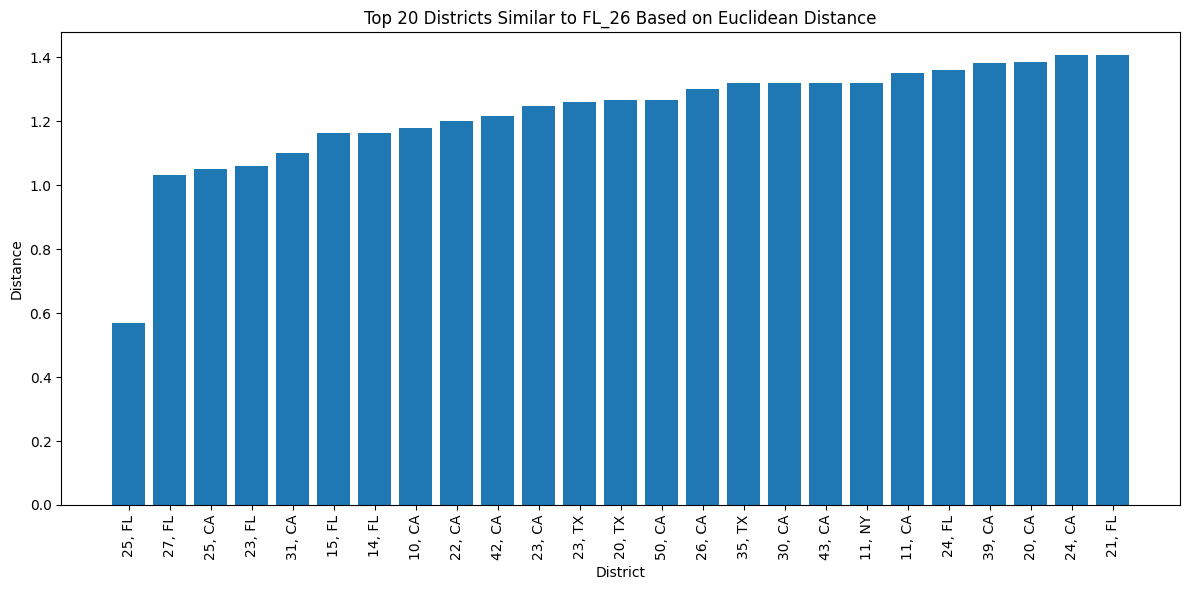

In [ ]:
# prompt: plot df

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'NAME' is the column with district names
plt.figure(figsize=(12, 6))
plt.bar(df['NAME'], df['Distance'])
plt.xlabel('District')
plt.ylabel('Distance')
plt.title('Top 20 Districts Similar to FL_26 Based on Euclidean Distance')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
# prompt: read /content/drive/MyDrive/fl_26_distances_TOP_20.csv to dataframe

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/census_data.csv')
df.head()


,NAME,Total population,White alone (race),Black or African American alone (race),Median household income,Bachelor's degree (Educational attainment),Unemployment (16 years and over),Below poverty level,Median value of owner-occupied housing units,Total number of households,...,Families in poverty,Poverty rate of children under 18,Means of transportation to work,Workers who work from home,Total male population,Total female population,Population under 5 years,Population 65 years and over,state,congressional district
0,"Congressional District 10 (116th Congress), Ca...",764549,473451,25644,74420,63205,26859,95682,372700,240615,...,181217,95682,320490,320490,383649,380900,27719,7254,6,10
1,"Congressional District 11 (116th Congress), Ca...",767298,394083,59856,106592,149506,23371,67384,736800,274210,...,191360,67384,365698,365698,377624,389674,22212,8481,6,11
2,"Congressional District 12 (116th Congress), Ca...",757251,345230,40138,127278,219100,24772,78325,1204200,326916,...,147922,78325,442851,442851,389477,367774,17548,8522,6,12
3,"Congressional District 13 (116th Congress), Ca...",772203,303169,123072,92969,159146,25149,95022,835900,291910,...,162403,95022,399059,399059,377018,395185,20100,7923,6,13
4,"Congressional District 14 (116th Congress), Ca...",747495,301467,20936,129943,162492,20584,48940,1156600,257027,...,176805,48940,396969,396969,372447,375048,19570,8288,6,14


In [ ]:
# prompt: Filter df by Name in ['Congressional District 39 (116th Congress), California', 'Congressional District 23 (116th Congress), Texas', 'Congressional District 26 (118th Congress), Florida ']

filtered_df = df[df['NAME'].isin(['Congressional District 3 (116th Congress), Nevada', 'Congressional District 1 (116th Congress), Arizona', 'Congressional District 26 (116th Congress), Florida'])]
filtered_df

,NAME,Total population,White alone (race),Black or African American alone (race),Median household income,Bachelor's degree (Educational attainment),Unemployment (16 years and over),Below poverty level,Median value of owner-occupied housing units,Total number of households,...,Families in poverty,Poverty rate of children under 18,Means of transportation to work,Workers who work from home,Total male population,Total female population,Population under 5 years,Population 65 years and over,state,congressional district
59,"Congressional District 26 (116th Congress), Fl...",785278,485212,85171,65877,105807,19685,111416,342800,246796,...,191045,111416,374318,374318,386358,398920,23170,7375,12,26


In [ ]:
# prompt: filter df name like Florida

filtered_df = df[df['NAME'].str.contains('Florida')]
filtered_df['NAME']


,NAME
43,"Congressional District 10 (116th Congress), Fl..."
44,"Congressional District 11 (116th Congress), Fl..."
45,"Congressional District 12 (116th Congress), Fl..."
46,"Congressional District 13 (116th Congress), Fl..."
47,"Congressional District 14 (116th Congress), Fl..."
48,"Congressional District 15 (116th Congress), Fl..."
49,"Congressional District 16 (116th Congress), Fl..."
50,"Congressional District 17 (116th Congress), Fl..."
51,"Congressional District 18 (116th Congress), Fl..."
52,"Congressional District 19 (116th Congress), Fl..."


In [ ]:
df

,NAME,Total population,White alone (race),Black or African American alone (race),Median household income,Bachelor's degree (Educational attainment),Unemployment (16 years and over),Below poverty level,Median value of owner-occupied housing units,Total number of households,...,Families in poverty,Poverty rate of children under 18,Means of transportation to work,Workers who work from home,Total male population,Total female population,Population under 5 years,Population 65 years and over,state,congressional district
0,"Congressional District 10 (116th Congress), Ca...",764549,473451,25644,74420,63205,26859,95682,372700,240615,...,181217,95682,320490,320490,383649,380900,27719,7254,6,10
1,"Congressional District 11 (116th Congress), Ca...",767298,394083,59856,106592,149506,23371,67384,736800,274210,...,191360,67384,365698,365698,377624,389674,22212,8481,6,11
2,"Congressional District 12 (116th Congress), Ca...",757251,345230,40138,127278,219100,24772,78325,1204200,326916,...,147922,78325,442851,442851,389477,367774,17548,8522,6,12
3,"Congressional District 13 (116th Congress), Ca...",772203,303169,123072,92969,159146,25149,95022,835900,291910,...,162403,95022,399059,399059,377018,395185,20100,7923,6,13
4,"Congressional District 14 (116th Congress), Ca...",747495,301467,20936,129943,162492,20584,48940,1156600,257027,...,176805,48940,396969,396969,372447,375048,19570,8288,6,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,"Congressional District 33 (116th Congress), Texas",727423,354537,116284,48371,38241,23849,150629,135700,226777,...,161075,150629,320517,320517,365294,362129,29089,5866,48,33
90,"Congressional District 34 (116th Congress), Texas",712253,527771,9191,44413,51302,17932,177204,89200,220748,...,167186,177204,273696,273696,357060,355193,27814,5741,48,34
91,"Congressional District 35 (116th Congress), Texas",805089,495969,71206,56183,90466,23701,139636,182900,298234,...,181206,139636,398915,398915,406647,398442,26516,6615,48,35
92,"Congressional District 36 (116th Congress), Texas",759111,567730,68554,65901,65658,26033,104643,163100,266328,...,189710,104643,318766,318766,382138,376973,26006,7137,48,36
